<a href="https://colab.research.google.com/github/jatin7k8/Yulu_bike_data_analysis/blob/main/Yulu_data_anlysis_p1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats
warnings.simplefilter(action='ignore', category = FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning, module="matplotlib")

plt.style.use('seaborn-darkgrid')

<ipython-input-161-38a71f9b6d72>:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


Column Profiling:

* datetime: datetime
* season: season (1: spring, 2: summer, 3: fall, 4: winter)
* holiday: whether day is a holiday or not (extracted from http://dchr.dc.gov/* page/holiday-schedule)
* workingday: if day is neither weekend nor holiday is 1, otherwise is 0.
* weather:
* 1: Clear, Few clouds, partly cloudy, partly cloudy
* 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
* 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + * Scattered clouds
* 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
* temp: temperature in Celsius
* atemp: feeling temperature in Celsius
* humidity: humidity
* windspeed: wind speed
* casual: count of casual users
* registered: count of registered users
* count: count of total rental bikes including both casual and registered

In [ ]:
# yulu data set upload
# parse_dates is changing data type of column object to datetime
df = pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089',  parse_dates=['datetime'])

In [ ]:
df.sample(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
4133,2011-10-04 06:00:00,4,0,1,1,16.40,20.455,82,7.0015,3,109,112
3003,2011-07-14 01:00:00,3,0,1,1,27.06,31.060,61,16.9979,4,21,25
1924,2011-05-07 02:00:00,2,0,0,1,17.22,21.210,82,6.0032,5,47,52
6798,2012-04-01 13:00:00,2,0,0,2,18.04,21.970,62,12.9980,190,274,464
10378,2012-11-17 20:00:00,4,0,0,2,13.94,17.425,66,6.0032,30,142,172
2109,2011-05-14 19:00:00,2,0,0,3,22.14,25.760,94,8.9981,69,179,248
9434,2012-09-16 11:00:00,3,0,0,1,26.24,31.060,47,11.0014,183,376,559
2482,2011-06-11 08:00:00,2,0,0,1,30.34,34.090,58,12.9980,32,111,143
9149,2012-09-04 14:00:00,3,0,1,1,32.80,37.880,55,27.9993,72,202,274
2556,2011-06-14 10:00:00,2,0,1,1,25.42,31.060,46,15.0013,33,97,130


In [ ]:
def overview(dataframe):
    m, n = df.shape
    print(f"Total Number of rows/data points :- {m}\nTotal number of columns :- {n}")
    print("*"*30,"\n")
    print("Data type of each column:- \n", df.dtypes)
    print("*"*30,"\n")
    print("The number of null values in each column are:\n", df.isnull().sum())
    print("*"*30,"\n")
    print(f"Number of total duplicate values : - {df.duplicated().sum()}")
    print("*"*30,"\n")


overview(df)

Total Number of rows/data points :- 10886
Total number of columns :- 12
****************************** 

Data type of each column:- 
 datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
dtype: object
****************************** 

The number of null values in each column are:
 datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64
****************************** 

Number of total duplicate values : - 0
****************************** 



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


# Outlier detection

In [ ]:
feature = ['temp', 'atemp','humidity', 'windspeed', 'casual', 'registered', 'count']

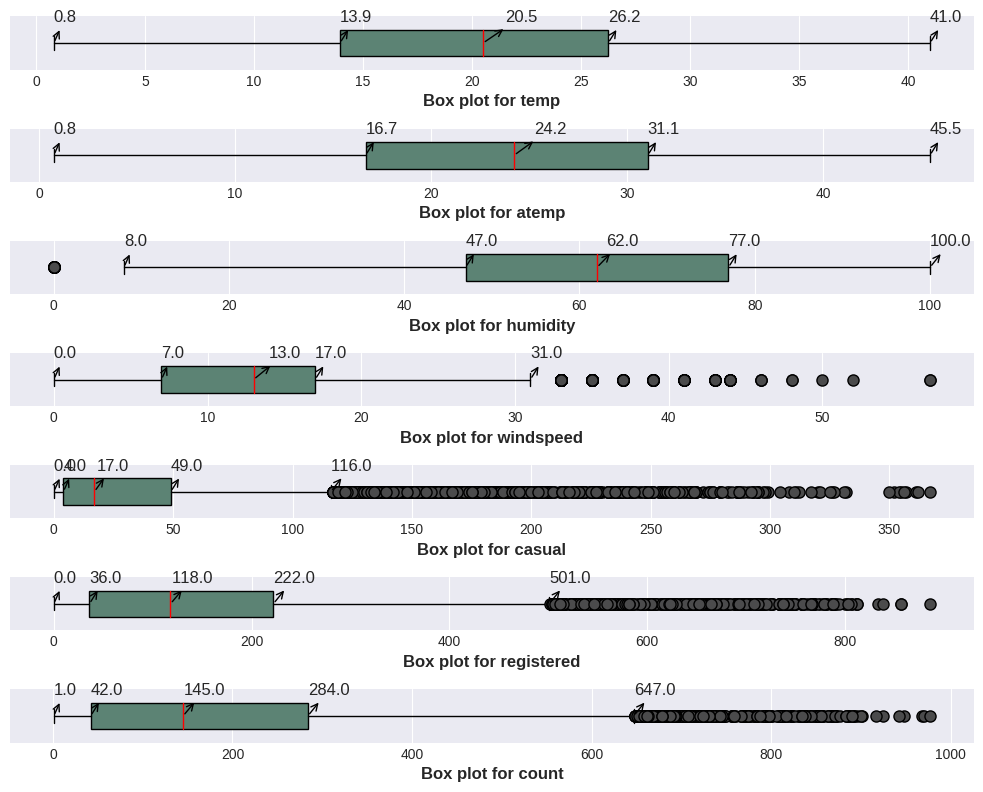

In [ ]:

# Features to create box plots for
features = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']

# Set up subplots
fig, axes = plt.subplots(nrows=len(features), ncols=1, figsize=(10, 8))

# Use a for loop to create box plots for each feature
for i, feature in enumerate(features):
    # Creating box plot for the current feature
    ax = axes[i]
    boxplot = ax.boxplot(x=df[feature], vert=False, patch_artist=True, widths=0.5)

    # Customize box and whisker colors
    boxplot['boxes'][0].set(facecolor='#5C8374')

    # Customize median line
    boxplot['medians'][0].set(color='red')

    # Customize outlier markers
    for flier in boxplot['fliers']:
        flier.set(marker='o', markersize=8, markerfacecolor="#4b4b4c")

    # Removing the axis lines
    for s in ['top', 'left', 'right']:
        ax.spines[s].set_visible(False)

    # Adding 5 point summary annotations
    info = [k.get_xdata() for k in boxplot['whiskers']]
    median_val = df[feature].median()

    for q1, q3 in info:
        ax.annotate(text=f"{q1:.1f}", xy=(q1, 1), xytext=(q1, 1.4), fontsize=12,
                    arrowprops=dict(arrowstyle="<-", lw=1, connectionstyle="arc,rad=0"))

        ax.annotate(text=f"{q3:.1f}", xy=(q3, 1), xytext=(q3, 1.4), fontsize=12,
                    arrowprops=dict(arrowstyle="<-", lw=1, connectionstyle="arc,rad=0"))

    # Adding the median separately because it was not included in info list
    ax.annotate(text=f"{median_val:.1f}", xy=(median_val, 1), xytext=(median_val + 1, 1.4), fontsize=12,
                arrowprops=dict(arrowstyle="<-", lw=1, connectionstyle="arc,rad=0"))

    # Removing y-axis ticks
    ax.set_yticks([])

    # Adding axis label
    ax.set_xlabel(f'Box plot for {feature}', fontweight='bold', fontsize=12)

# Adjust layout for better visualization
plt.tight_layout()
plt.show()


* There is no oultlier in the `temp` column.

* There is few oultlier present in `atemp and humidity` column.

* There are many outlier present in each of the column : `resgistered, casual ,count.`

* Interpreation of the outliers

In [ ]:
def outlier_info(df, columns_list):
  for i in columns_list:
    print(f"\t\t Outlier for featuere `{i}`" )
    q1 = df[i].quantile(0.25)
    q2 = df[i].median()
    q3 = df[i].quantile(0.75)
    iqr = q3 -q1
    lower_whisker = q1 - (1.5*iqr)
    upper_whisker = q3 + (1.5* iqr)
    print(f"* lower_whisker :- {lower_whisker}\n* upper_whisker :- {upper_whisker}\n* Quantile1 :- {q1}\n* Median/Quantile 2:- {q2}\n* Quantile 3:- {q3}\n* Inter-Quantile-Range :- {iqr}")
    print("-"*90)
    print()


In [ ]:
outlier_info(df, ['humidity', 'windspeed', 'casual', 'registered', 'count'])

		 Outlier for featuere `humidity`
* lower_whisker :- 2.0
* upper_whisker :- 122.0
* Quantile1 :- 47.0
* Median/Quantile 2:- 62.0
* Quantile 3:- 77.0
* Inter-Quantile-Range :- 30.0
------------------------------------------------------------------------------------------

		 Outlier for featuere `windspeed`
* lower_whisker :- -7.993100000000002
* upper_whisker :- 31.992500000000003
* Quantile1 :- 7.0015
* Median/Quantile 2:- 12.998
* Quantile 3:- 16.9979
* Inter-Quantile-Range :- 9.996400000000001
------------------------------------------------------------------------------------------

		 Outlier for featuere `casual`
* lower_whisker :- -63.5
* upper_whisker :- 116.5
* Quantile1 :- 4.0
* Median/Quantile 2:- 17.0
* Quantile 3:- 49.0
* Inter-Quantile-Range :- 45.0
------------------------------------------------------------------------------------------

		 Outlier for featuere `registered`
* lower_whisker :- -243.0
* upper_whisker :- 501.0
* Quantile1 :- 36.0
* Median/Quantile 2:- 118

in weather column changing 1, 2, 3 ,4 values according to weather conditions
1. Clear Sky/Partly Cloudy:
* Clear
* Few clouds
* Partly cloudy

2. Misty/Cloudy:
* Mist + Cloudy
* Mist + Broken clouds
* Mist + Few clouds
* Mist

3. Light Precipitation:
* Light Snow
* Light Rain + Thunderstorm + Scattered clouds
* Light Rain + Scattered clouds

4. Heavy Precipitation/Extreme Conditions:
* Heavy Rain + Ice Pallets + Thunderstorm + Mist
* Snow + Fog

In [ ]:
x = df.copy()

In [ ]:
# season: season (1: spring, 2: summer, 3: fall, 4: winter)
x['season'] = x.groupby('season')['season'].apply(lambda x: x.map({1: 'spring',
                          2:'summer',
                          3: 'fall',
                          4: 'winter'}))

In [ ]:
x['weather'] = x.groupby('weather')['weather'].apply(lambda x: x.map({1: 'Clear Sky/Partly Cloudy',
                          2:'Misty/Cloudy',)
                          3: 'Light Precipitation',
                          4: 'Heavy Precipitation/Extreme Conditions'})

In [ ]:
x['year'] = x['datetime'].dt.year
x['month'] = x['datetime'].dt.month
x['day'] = x['datetime'].dt.day
x['quarter'] = x['datetime'].dt.quarter

In [ ]:
x['quarter'] = x.groupby('quarter')['quarter'].apply(lambda x: x.map({1: 'Quater-1',
                          2:'Quater-2',
                          3: 'Quater-3',
                          4: 'Quater-4'}))

In [ ]:
x['month'] = x.groupby('month')['month'].apply(lambda x: x.map({  1: 'January',
                                                      2: 'February',
                                                      3: 'March',
                                                      4: 'April',
                                                      5: 'May',
                                                      6: 'June',
                                                      7: 'July',
                                                      8: 'August',
                                                      9: 'September',
                                                      10: 'October',
                                                      11: 'November',
                                                      12: 'December'
                                                  }))

In [ ]:
x.describe(include = 'object')

,season,weather,month,quarter
count,10886,10886,10886,10886
unique,4,4,12,4
top,winter,Clear Sky/Partly Cloudy,May,Quater-4
freq,2734,7192,912,2734


In [ ]:
x.describe()

,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,count,year,day
count,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,0.028569,0.680875,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132,2011.501929,9.992559
std,0.166599,0.466159,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454,0.500019,5.476608
min,0.000000,0.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000,2011.000000,1.000000
25%,0.000000,0.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000,2011.000000,5.000000
50%,0.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000,2012.000000,10.000000
75%,0.000000,1.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000,2012.000000,15.000000
max,1.000000,1.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000,2012.000000,19.000000


In [ ]:
for i in ['holiday', 'workingday', 	'season',	'weather',	'month',	'quarter']:
  print(f"For Feature :- {i} \nTotal no of counts {x[i].count()} \nAnd number of unique value :{x[i].nunique()}")
  print(f"{x[i].unique()}")
  print()
  print("*"*100)
  print()

For Feature :- holiday 
Total no of counts 10886 
And number of unique value :2
[0 1]

****************************************************************************************************

For Feature :- workingday 
Total no of counts 10886 
And number of unique value :2
[0 1]

****************************************************************************************************

For Feature :- season 
Total no of counts 10886 
And number of unique value :4
['spring' 'summer' 'fall' 'winter']

****************************************************************************************************

For Feature :- weather 
Total no of counts 10886 
And number of unique value :4
['Clear Sky/Partly Cloudy' 'Misty/Cloudy' 'Light Precipitation'
 'Heavy Precipitation/Extreme Conditions']

****************************************************************************************************

For Feature :- month 
Total no of counts 10886 
And number of unique value :12
['January' 'February' 'March' 'A

In [ ]:
# statical information numerical vs categorical
def statical_info_cat(df, column_list):
  for i in column_list:
    print(f"\t\t Statical inforamtion for featuere `{i}`" )
    print(x.groupby(i).agg(Average_Temperature = ('temp','mean'),
                            Average_Feeling_Temperature = ("atemp",'mean'),
                            Average_Humididty = ('humidity', 'mean'),
                            Average_Windspeed = ('windspeed', 'mean'),
                            Average_Casual_Bike_rents = ('casual', 'mean'),
                            Average_Registered_Bike_rents = ('registered', 'mean'),
                            Average_Count_Bike_rents = ('count', 'mean')))
    print("-"*100)
    print()

In [ ]:
cat_col = ['season', 'month', 'weather','holiday','workingday']
statical_info_cat(x, cat_col)

		 Statical inforamtion for featuere `season`
        Average_Temperature  Average_Feeling_Temperature  Average_Humididty  \
season                                                                        
fall              28.789111                    32.540783          64.123674   
spring            12.530491                    15.228956          56.297841   
summer            22.823483                    26.647098          60.852909   
winter            16.649239                    20.059909          66.173738   

        Average_Windspeed  Average_Casual_Bike_rents  \
season                                                 
fall            11.508862                  52.220271   
spring          14.636978                  15.489576   
summer          13.405607                  47.446762   
winter          11.678147                  28.580834   

        Average_Registered_Bike_rents  Average_Count_Bike_rents  
season                                                           
fall      

In [ ]:
x["datetime"].max()

Timestamp('2012-12-19 23:00:00')

In [ ]:
x["datetime"].min()

Timestamp('2011-01-01 00:00:00')

# What is the time period for which the data is given ?

In [ ]:
# working with date time columns
x["datetime"].max() - df["datetime"].min()


Timedelta('718 days 23:00:00')

# Univerative analysis:-

## UA - on Categorical columns

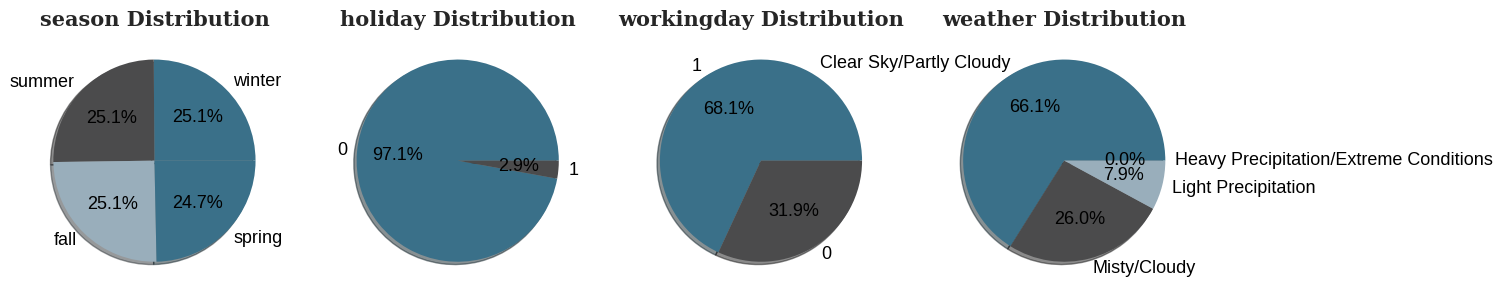

In [ ]:
def create_pie_chart(ax, data_series, title):
    color_map = ["#3A7089", "#4b4b4c", "#99AEBB"]

    ax.pie(data_series.values, labels=data_series.index, autopct='%.1f%%',
           shadow=True, colors=color_map, textprops={'fontsize': 13, 'color': 'black'})

    ax.set_title(title, {'font': 'serif', 'size': 15, 'weight': 'bold'})


def visualize_data_distribution(df, columns_list):
    fig = plt.figure(figsize=(15, 12))
    gs = fig.add_gridspec(1, len(columns_list))

    for c, column in enumerate(columns_list):
        ax = fig.add_subplot(gs[0, c])
        create_pie_chart(ax, x[column].value_counts(), f'{column} Distribution')

    plt.show()

cat_col = ['season', 'holiday', 'workingday', 'weather']

visualize_data_distribution(df, cat_col)


## UA - on Numerical columns

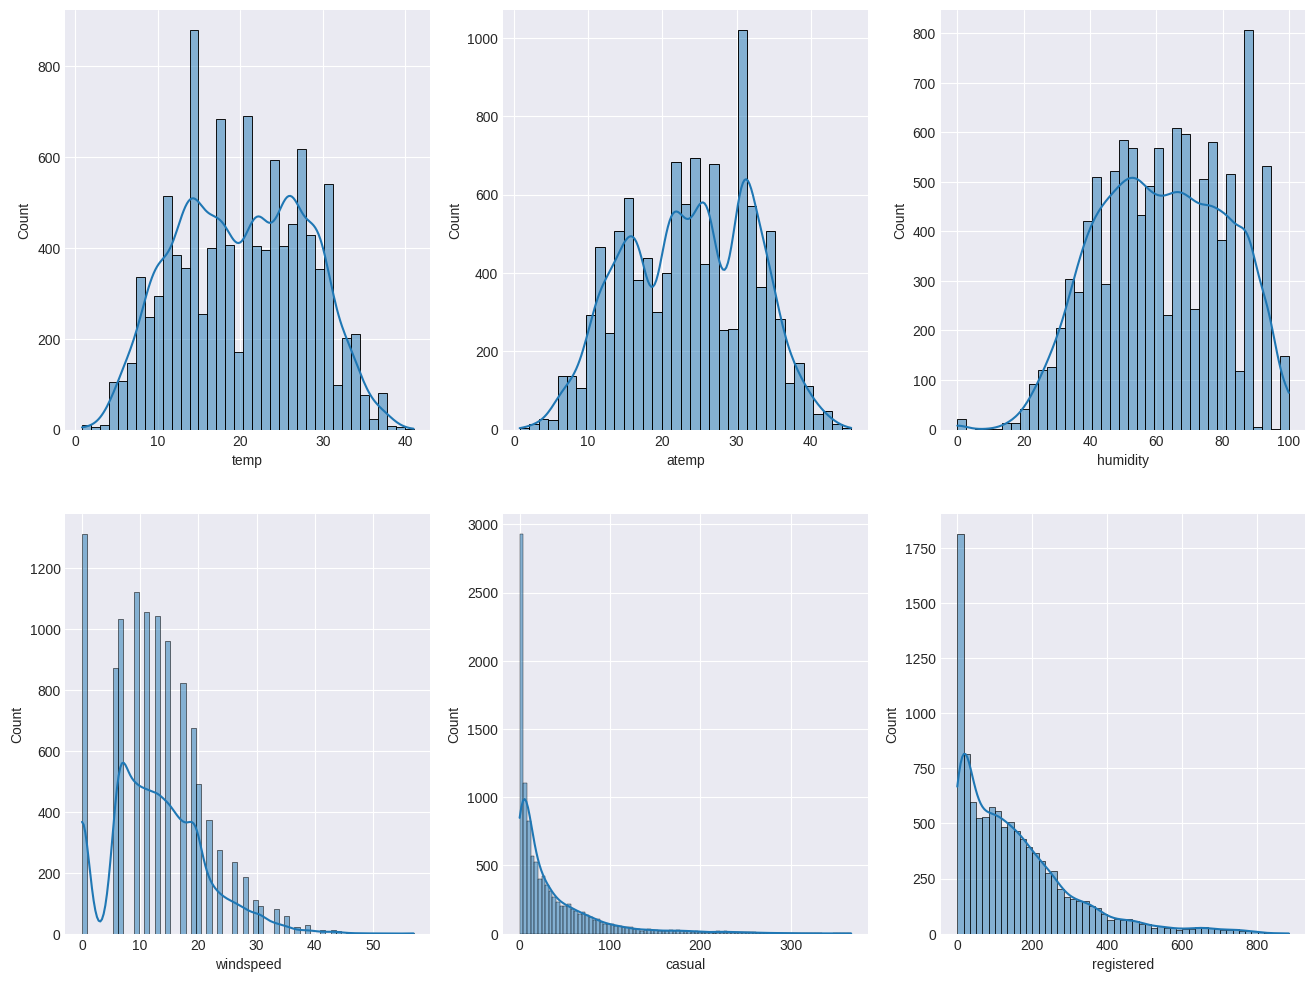

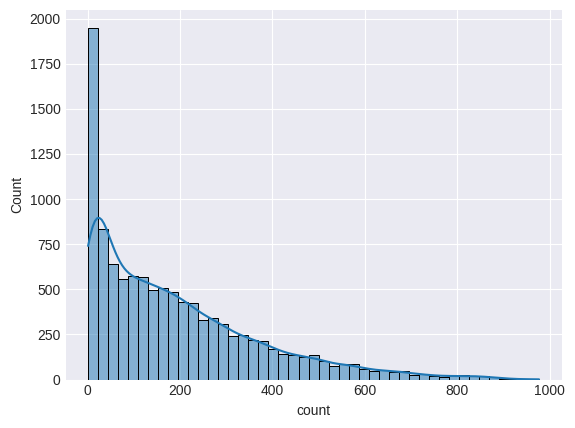

In [ ]:
# understanding the distribution for numerical variables
num_cols = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered','count']

fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(16, 12))

index = 0
for row in range(2):
    for col in range(3):
        sns.histplot(df[num_cols[index]], ax=axis[row, col], kde=True)
        index += 1

plt.show()
sns.histplot(df[num_cols[-1]], kde=True)
plt.show()

* casual, registered and count somewhat looks like Log Normal Distrinution
* temp, atemp and humidity looks like they follows the Normal Distribution

* windspeed follows the binomial distribution

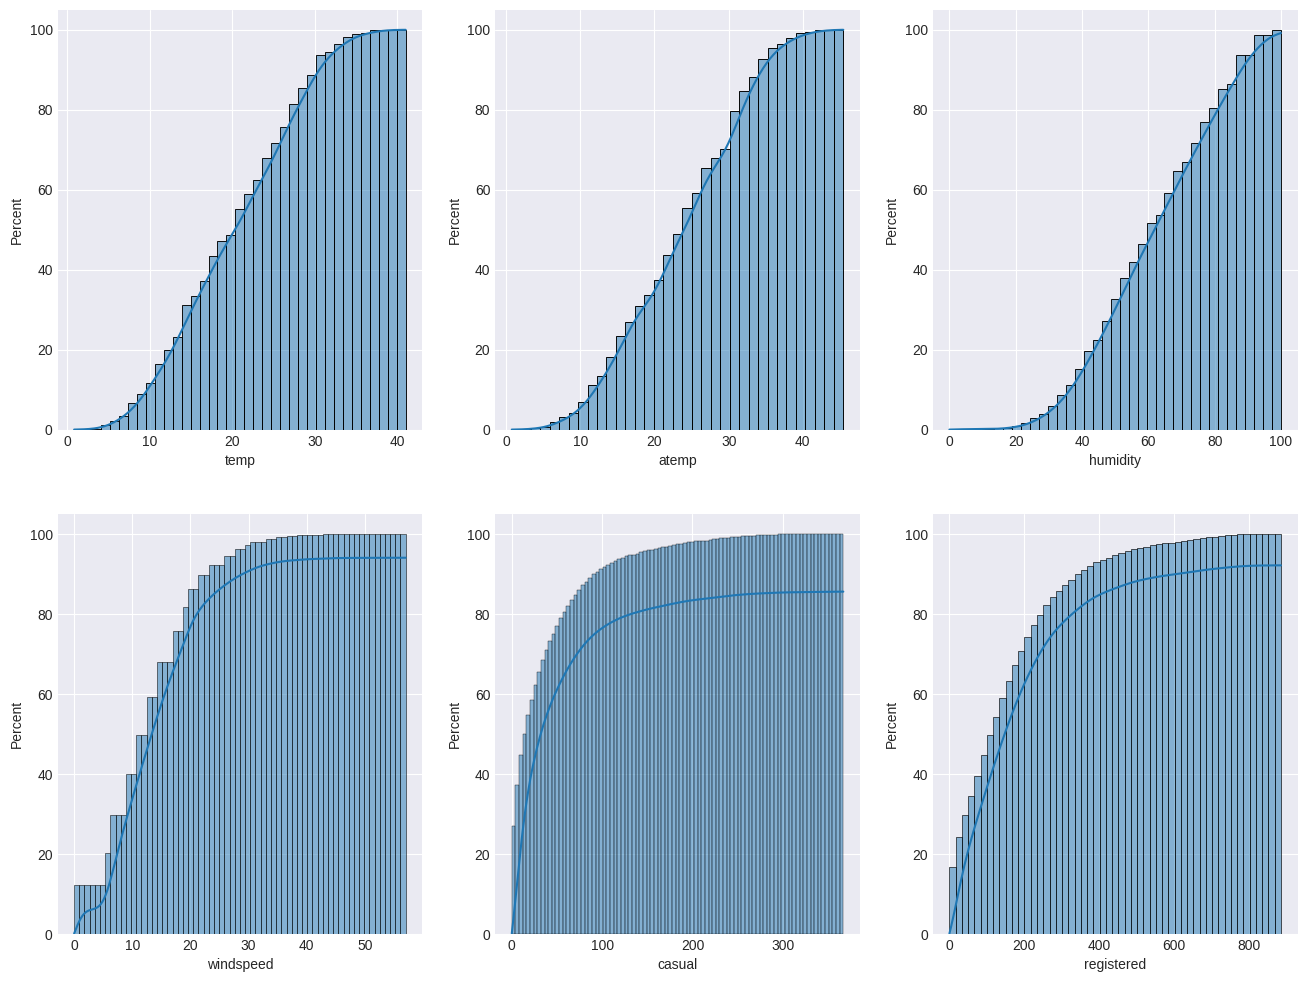

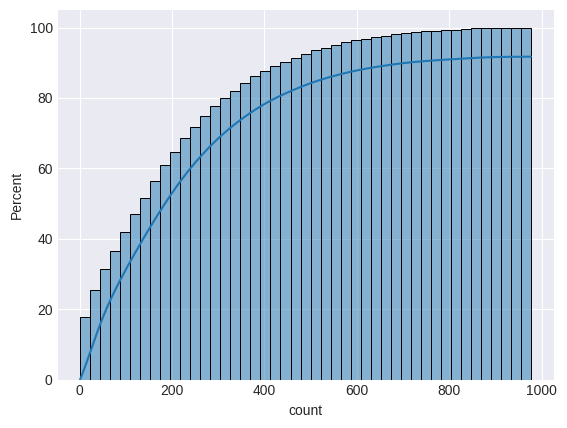

In [ ]:
# understanding the distribution for numerical variables
num_cols = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered','count']

fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(16, 12))

index = 0
for row in range(2):
    for col in range(3):
        sns.histplot(x[num_cols[index]], ax=axis[row, col],  kde = True, cumulative = True, stat = 'percent')
        index += 1

plt.show()
sns.histplot(x[num_cols[-1]],  kde = True, cumulative = True, stat = 'percent')
plt.show()

# insights : -  
* For Feature Casual:- More than 80 % of the time, the count of casual users is less than 60.
* For Feature count :- More than 85 % of the time, the count of registered users is less than 300.

* More than 85 % of the total windspeed data has a value of less than 20.

* For Feature Humididty :- More than 80 % of the time, the humidity value is greater than 40. Thus for most of the time, humidity level varies from optimum to too moist.

*

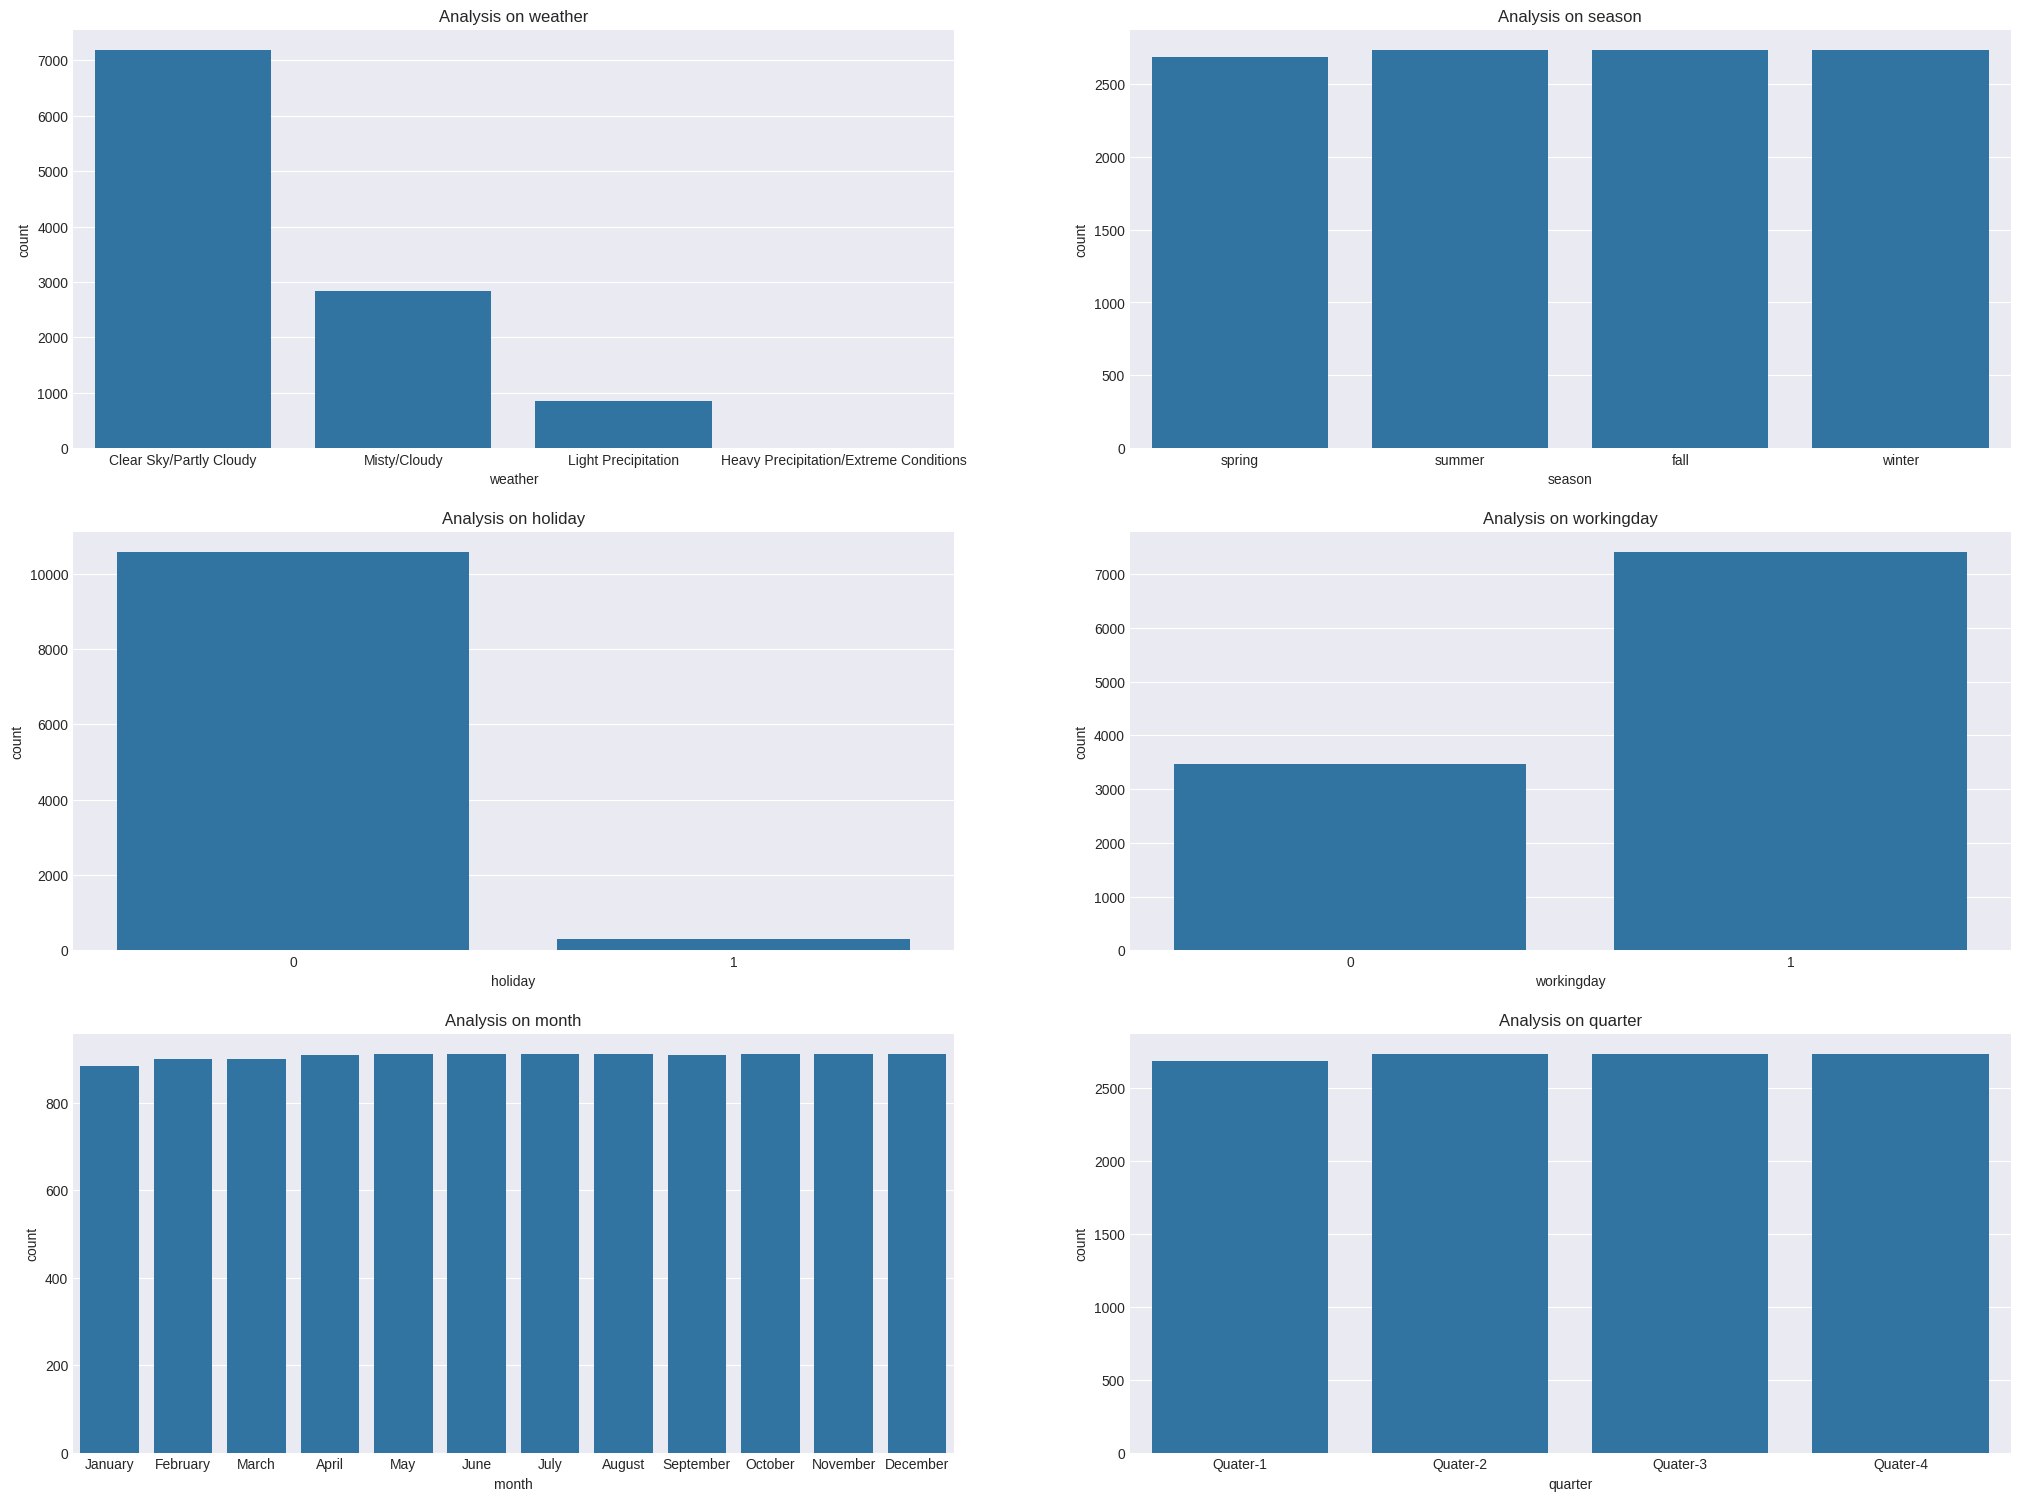

In [ ]:
# Analysis on the features provided with their corresponding count in the datapoints
plt.figure(figsize = (25,25))
features = ['weather', 'season', 'holiday', 'workingday',"month","quarter"]
for i in range(len(features)):
     plt.subplot(4, 2, i+1)
     sns.countplot(x = x[features[i]])
     plt.title('Analysis on {}'.format(features[i]))

plt.show()

[]

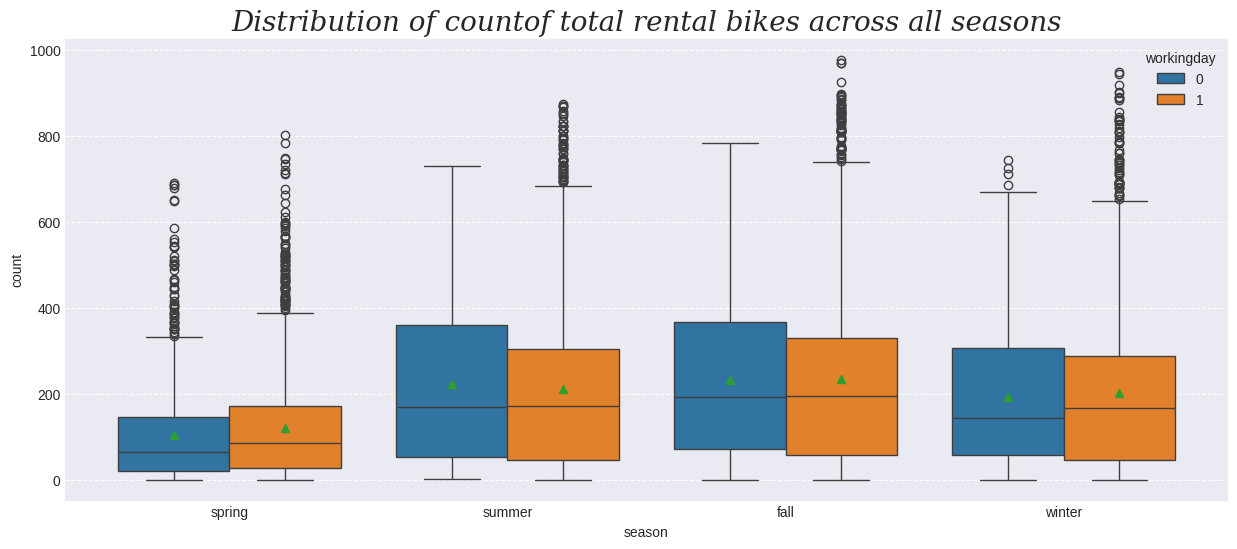

In [ ]:
plt.figure(figsize = (15, 6))
plt.title('Distribution of countof total rental bikes across all seasons',
         fontdict = {'size' : 20,
                    'style' : 'oblique',
                    'family' : 'serif'})
sns.boxplot(data = x, x = 'season', y = 'count', hue = 'workingday', showmeans = True)
plt.grid(axis = 'y', linestyle = '--')
plt.plot()

* The  count of total rental bikes is higher in the fall season, followed by the summer and winter seasons. It is generally low in the spring season

[]

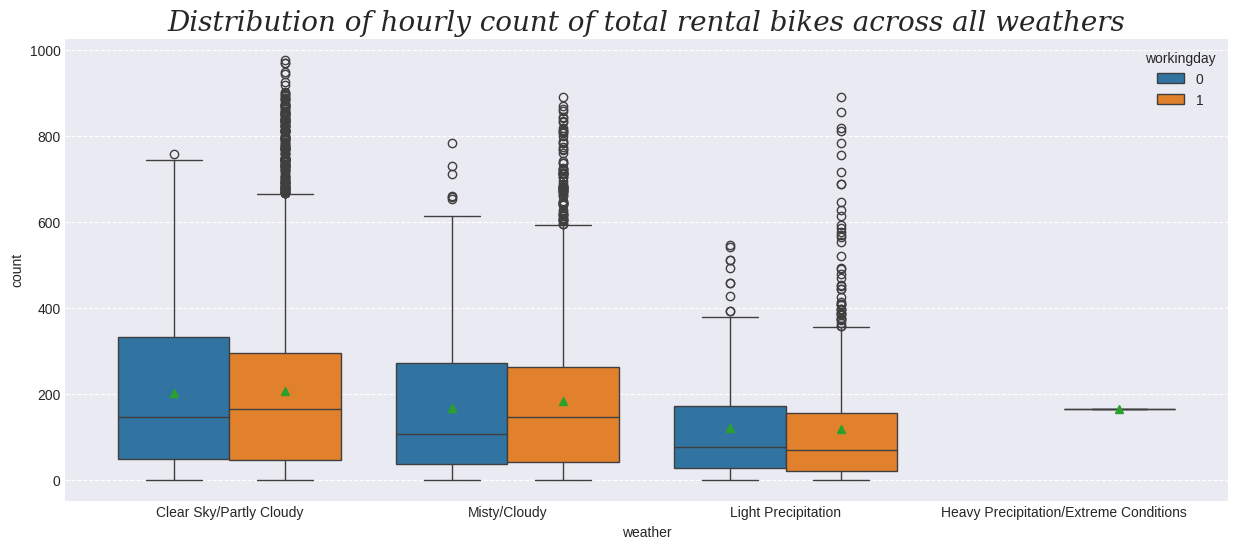

In [ ]:
plt.figure(figsize = (15, 6))
plt.title('Distribution of hourly count of total rental bikes across all weathers',
         fontdict = {'size' : 20,
                    'style' : 'oblique',
                    'family' : 'serif'})
sns.boxplot(data = x, x = 'weather', y = 'count', hue = 'workingday', showmeans = True)
plt.grid(axis = 'y', linestyle = '--')
plt.plot()

* The hourly count of total rental bikes is higher in the clear and cloudy weather, followed by the misty weather and rainy weather. There are very few records for extreme weather conditions.

# Is there any effect of Working Day on the number of electric cycles rented ?

In [ ]:
x.groupby('workingday')['count'].describe()

,count,mean,std,min,25%,50%,75%,max
workingday,,,,,,,,
0,3474.0,188.506621,173.724015,1.0,44.0,128.0,304.0,783.0
1,7412.0,193.011873,184.513659,1.0,41.0,151.0,277.0,977.0


[]

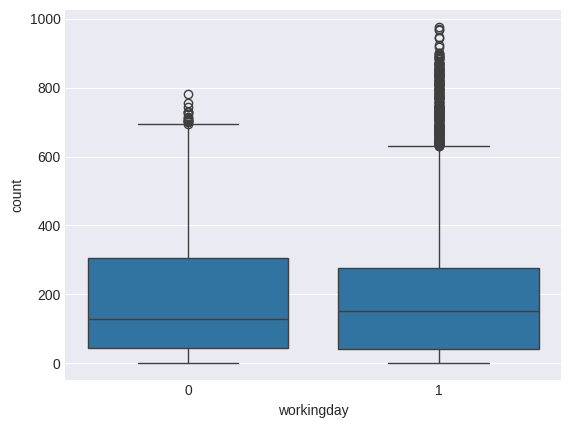

In [ ]:
sns.boxplot(data = x, x = 'workingday', y = 'count')
plt.plot()

* **STEP-1** : Set up Null Hypothesis

**Null Hypothesis ( H0 ) -** Working Day does not have any effect on the number of electric cycles rented.

**Alternate Hypothesis ( HA ) -** Working Day has some effect on the number of electric cycles rented

* STEP-2: Checking for basic assumpitons for the hypothesis

Distribution check using **QQ Plot**
Homogeneity of Variances **using Levene's test**
* STEP-3: Define Test statistics; Distribution of T under H0.

If the assumptions of T Test are met then we can proceed performing T Test for independent samples

else we will perform the non parametric test equivalent to **T Test for independent** sample i.e., **Mann-Whitney U rank test** for two independent samples.

* STEP-4: Compute the p-value and fix value of alpha.

  We set our **alpha to be 0.05**
* STEP-5: Compare p-value and alpha.

Based on p-value, we will accept or reject H0.

* p-val > alpha : Accept H0
* p-val < alpha : Reject H0


Visual Tests to know if the samples follow **normal distribution**

[]

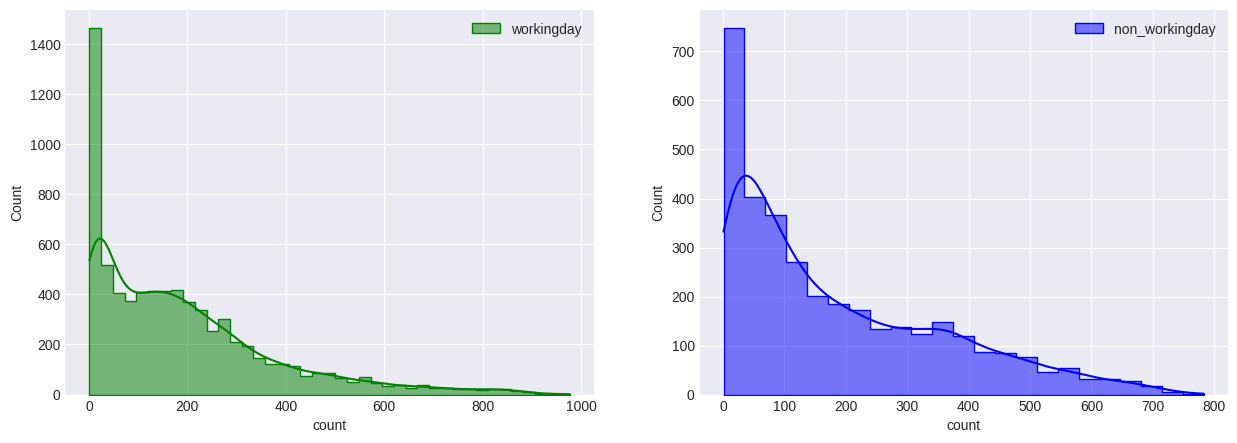

In [ ]:
plt.figure(figsize = (15, 5))
plt.subplot(1, 2, 1)
sns.histplot(df.loc[df['workingday'] == 1, 'count'],
             element = 'step', color = 'green', kde = True, label = 'workingday')
plt.legend()
plt.subplot(1, 2, 2)
sns.histplot(df.loc[df['workingday'] == 0, 'count'],
             element = 'step', color = 'blue', kde = True, label = 'non_workingday')
plt.legend()
plt.plot()

* It can be inferred from the above plot that the distributions do not follow normal distribution.

**Distribution check using QQ Plot**

[]

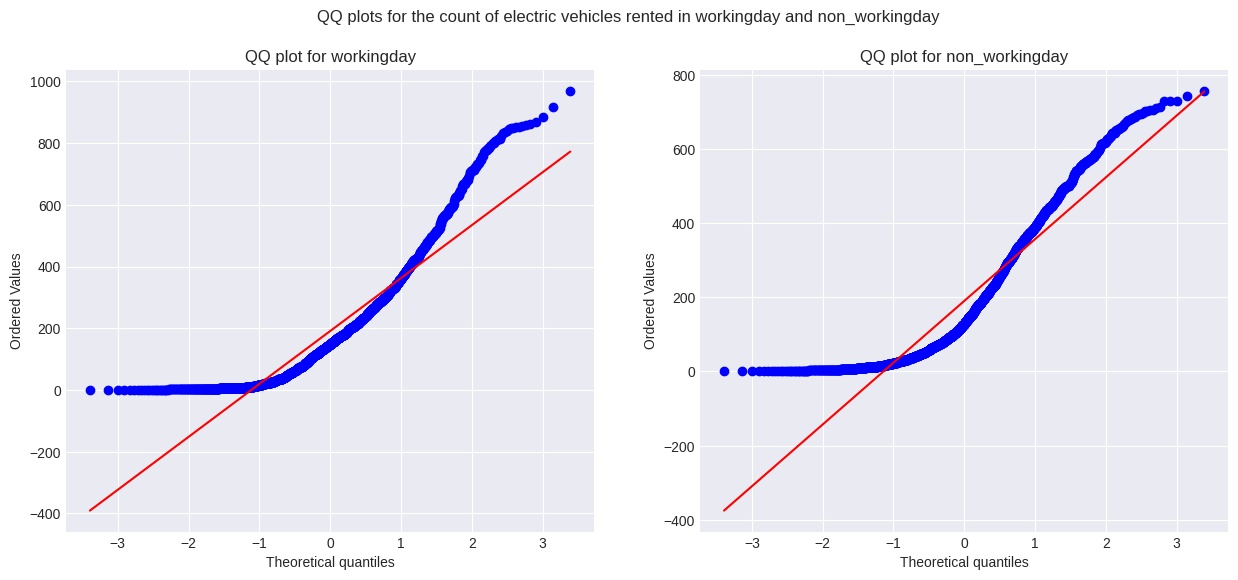

In [ ]:
plt.figure(figsize = (15, 6))
plt.subplot(1, 2, 1)
plt.suptitle('QQ plots for the count of electric vehicles rented in workingday and non_workingday')
stats.probplot(df.loc[df['workingday'] == 1, 'count'].sample(2000), plot = plt, dist = 'norm')
plt.title('QQ plot for workingday')
plt.subplot(1, 2, 2)
stats.probplot(df.loc[df['workingday'] == 0, 'count'].sample(2000), plot = plt, dist = 'norm')
plt.title('QQ plot for non_workingday')
plt.plot()

* It can be inferred from the above plot that the distributions do not follow normal distribution.
* It can be seen from the above plots that the samples do not come from normal distribution.
* Applying **Shapiro-Wilk test** for normality

 * H0 : The sample follows normal distribution
 * Ha : The sample does not follow normal distribution

* alpha = 0.05

* Test Statistics : Shapiro-Wilk test for normality

In [ ]:
test_stat, p_value = stats.shapiro(df.loc[df['workingday'] == 1, 'count'].sample(2000))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 5.049032621897269e-37
The sample does not follow normal distribution


In [ ]:
test_stat, p_value = stats.shapiro(df.loc[df['workingday'] == 0, 'count'].sample(2000))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 5.561428144929069e-36
The sample does not follow normal distribution


**Transforming the data using boxcox transformation and checking if the transformed data follows normal distribution.**

In [ ]:
transformed_workingday = stats.boxcox(df.loc[df['workingday'] == 1, 'count'])[0]
test_stat, p_value = stats.shapiro(transformed_workingday)
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')


p-value 1.6132153862898905e-33
The sample does not follow normal distribution


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [ ]:
transformed_workingday = stats.boxcox(df.loc[df['workingday'] == 0, 'count'])[0]
test_stat, p_value = stats.shapiro(transformed_workingday)
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 8.133891151192298e-24
The sample does not follow normal distribution


* Even after applying the boxcox transformation on each of the "workingday" and "non_workingday" data, the samples do not follow normal distribution.


Homogeneity of Variances using **Lavene's test**

In [ ]:
# Null Hypothesis(H0) - Homogenous Variance

# Alternate Hypothesis(HA) - Non Homogenous Variance

test_stat, p_value = stats.levene(df.loc[df['workingday'] == 1, 'count'].sample(2000),
                                df.loc[df['workingday'] == 0, 'count'].sample(2000))
print('p-value', p_value)
if p_value < 0.05:
    print('The samples do not have  Homogenous Variance')
else:
    print('The samples have Homogenous Variance ')


p-value 0.6781168192927362
The samples have Homogenous Variance 


Since the samples are not normally distributed, T-Test cannot be applied here, we can perform its non parametric equivalent test i.e., Mann-Whitney U rank test for two independent samples.

In [ ]:
# Ho : Mean no.of electric cycles rented is same for working and non-working days
# Ha : Mean no.of electric cycles rented is not same for working and non-working days
# Assuming significance Level to be 0.05
# Test statistics : Mann-Whitney U rank test for two independent samples

test_stat, p_value = stats.mannwhitneyu(df.loc[df['workingday'] == 1, 'count'],
                                      df.loc[df['workingday'] == 0, 'count'])
print('P-value :',p_value)
if p_value < 0.05:
    print('Mean no.of electric cycles rented is not same for working and non-working days')
else:
    print('Mean no.of electric cycles rented is same for working and non-working days')

P-value : 0.9679139953914079
Mean no.of electric cycles rented is same for working and non-working days


Therefore, the mean hourly count of the total rental bikes is statistically same for both working and non- working days .

# Is there any effect of holidays on the number of electric cycles rented ?

In [ ]:
df.groupby('holiday')['count'].describe()

,count,mean,std,min,25%,50%,75%,max
holiday,,,,,,,,
0,10575.0,191.741655,181.513131,1.0,43.0,145.0,283.0,977.0
1,311.0,185.877814,168.300531,1.0,38.5,133.0,308.0,712.0


[]

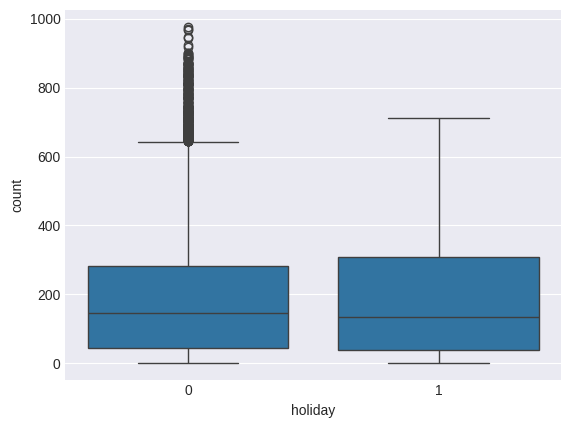

In [ ]:
sns.boxplot(data = df, x = 'holiday', y = 'count')
plt.plot()

Boxcox Transformation using :-  This transformation is typically used to stabilize the variance and make the data more closely approximate a normal distribution, which is a common assumption in many statistical methods.

In [ ]:
transformed_holiday = stats.boxcox(df.loc[df['holiday'] == 1, 'count'])[0]
test_stat, p_value = stats.shapiro(transformed_holiday)
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 2.1349286782879062e-07
The sample does not follow normal distribution


In [ ]:
transformed_holiday = stats.boxcox(df.loc[df['holiday'] == 0, 'count'])[0]
test_stat, p_value = stats.shapiro(transformed_holiday)
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 1.43188291313709e-36
The sample does not follow normal distribution


* Even after applying the boxcox transformation on each of the "holiday" and "non_holiday" data, the samples do not follow normal distribution.


Homogeneity of Variances using **Levene's test**

In [ ]:
# Null Hypothesis(H0) - Homogenous Variance

# Alternate Hypothesis(HA) - Non Homogenous Variance

test_stat, p_value = stats.levene(df.loc[df['holiday'] == 0, 'count'].sample(200),
                                df.loc[df['holiday'] == 1, 'count'].sample(200))
print('p-value', p_value)
if p_value < 0.05:
    print('The samples do not have  Homogenous Variance')
else:
    print('The samples have Homogenous Variance ')

p-value 0.7387761043523664
The samples have Homogenous Variance 


**Since the samples are not normally distributed, T-Test cannot be applied here, we can perform its non parametric equivalent test i.e., Mann-Whitney U rank test for two independent samples.**

In [ ]:
# Ho : No.of electric cycles rented is similar for holidays and non-holidays
# Ha : No.of electric cycles rented is not similar for holidays and non-holidays days
# Assuming significance Level to be 0.05
# Test statistics : Mann-Whitney U rank test for two independent samples

test_stat, p_value = stats.mannwhitneyu(df.loc[df['holiday'] == 0, 'count'].sample(200),
                                      df.loc[df['holiday'] == 1, 'count'].sample(200))
print('P-value :',p_value)
if p_value < 0.05:
    print('No.of electric cycles rented is not similar for holidays and non-holidays days')
else:
    print('No.of electric cycles rented is similar for holidays and non-holidays')

P-value : 0.4648397404093936
No.of electric cycles rented is similar for holidays and non-holidays


Therefore, the number of electric cycles rented is statistically similar for both holidays and non - holidays.

**Is weather dependent on the season ?**

In [ ]:
x[['weather', 'season']].describe()

,weather,season
count,10886,10886
unique,4,4
top,Clear Sky/Partly Cloudy,winter
freq,7192,2734


It is clear from the above statistical description that both 'weather' and 'season' features are categorical in nature.

**STEP-1 :** Set up Null Hypothesis

-----------------------------------------
**Null Hypothesis ( H0 )** - weather is independent of season

**Alternate Hypothesis ( HA )** - weather is dependent of seasons.

**STEP-2:** Define Test statistics

-----------------------------------------
Since we have **two categorical features**, the **Chi- square test** is applicable here. Under H0, the test statistic should follow Chi-Square Distribution.

**STEP-3:** Checking for basic assumptons for the hypothesis (Non-Parametric Test)

-----------------------------------------

1. The data in the cells should be frequencies, or counts of cases.
2. The levels (or categories) of the variables are **mutually exclusive**. That is, a particular subject fits into one and only one level of each of the variables.
3. There are 2 variables, and both are measured as categories.
4. The value of the cell expecteds **should be 5 or more in at least 80%** of the cells, and no cell should have an expected of less than one (3).

**STEP-4:** Compute the p-value and fix value of alpha.

-----------------------------------------

we will be computing the chi square-test p-value using the **chi2_contingency** function using scipy.stats. We set our alpha to be 0.05

**STEP-5:** Compare p-value and alpha.

-----------------------------------------
Based on p-value, we will accept or reject H0.

* p-val > alpha : Accept H0
* p-val < alpha : Reject H0

The **Chi-square statistic** is a **non-parametric (distribution free)** tool designed to analyze group differences when the dependent variable is measured at a **nominal level**. Like all **non-parametric statistics**,

the Chi-square is robust with respect to the distribution of the data. Specifically, it does not require **equality of variances** among the study groups or **homoscedasticity in the data.**

In [ ]:
# First, finding the contingency table such that each value is the total number of total bikes rented
  # for a particular season and weather
pd.crosstab(index = x['season'], columns = x['weather'],
            values = x['count'], aggfunc = np.sum).replace(np.nan , 0)

weather,Clear Sky/Partly Cloudy,Heavy Precipitation/Extreme Conditions,Light Precipitation,Misty/Cloudy
season,,,,
fall,470116.0,0.0,31160.0,139386.0
spring,223009.0,164.0,12919.0,76406.0
summer,426350.0,0.0,27755.0,134177.0
winter,356588.0,0.0,30255.0,157191.0


Since the above contingency table has one column in which the count of the rented electric vehicle is less than 5 in most of the cells, we can remove the weather 4 and then proceed further.

In [ ]:
cross_table = pd.crosstab(index = df['season'],
                          columns = df.loc[df['weather'] != 4, 'weather'],
                          values = df['count'],
                          aggfunc = np.sum)
cross_table

weather,1,2,3
season,,,
1,223009,76406,12919
2,426350,134177,27755
3,470116,139386,31160
4,356588,157191,30255


In [ ]:
chi_test_stat, p_value, dof, expected  = stats.chi2_contingency(cross_table)
print('Test Statistic =', chi_test_stat)
print('p value =', p_value)
print('-' * 65)
print("Expected : '\n'", expected)
alpha = 0.05
print('-' * 65)
if p_value < alpha:
    print('Reject Null Hypothesis')
else:
    print('Failed to reject Null Hypothesis')

Test Statistic = 10838.372332480214
p value = 0.0
-----------------------------------------------------------------
Expected : '
' [[221081.86259035  75961.44434981  15290.69305984]
 [416408.3330293  143073.60199337  28800.06497733]
 [453484.88557396 155812.72247031  31364.39195574]
 [385087.91880639 132312.23118651  26633.8500071 ]]
-----------------------------------------------------------------
Reject Null Hypothesis


**Therefore, there is statistically significant dependency of weather and season based on the number of number of bikes rented.**

# Is the number of cycles rented is similar or different in different weather ?

In [ ]:
df.groupby(by = 'weather')['count'].describe()

,count,mean,std,min,25%,50%,75%,max
weather,,,,,,,,
1,7192.0,205.236791,187.959566,1.0,48.0,161.0,305.0,977.0
2,2834.0,178.955540,168.366413,1.0,41.0,134.0,264.0,890.0
3,859.0,118.846333,138.581297,1.0,23.0,71.0,161.0,891.0
4,1.0,164.000000,NaN,164.0,164.0,164.0,164.0,164.0


[]

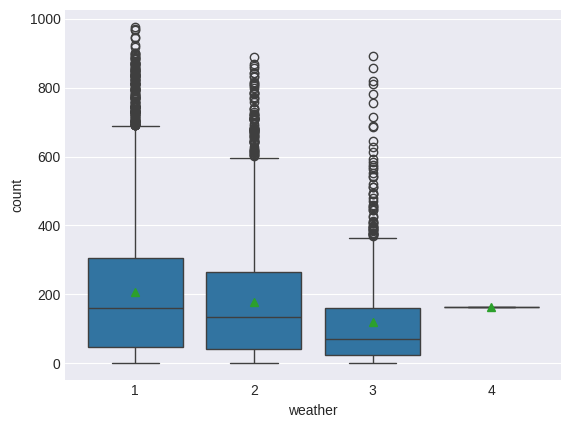

In [ ]:
sns.boxplot(data = df, x = 'weather', y = 'count', showmeans = True)
plt.plot()

**STEP-1 :** Set up Null Hypothesis

-----------------------------------------
**Null Hypothesis ( H0 ) -** Mean of cycle rented per hour is same for weather 1, 2 and 3.
(We wont be considering weather 4 as there in only 1 data point for weather 4 and we cannot perform a ANOVA test with a single data point for a group)

**Alternate Hypothesis ( HA ) -**Mean of cycle rented per hour is not same for season 1,2,3 and 4 are different.

**STEP-2:** Checking for basic assumpitons for the hypothesis

-----------------------------------------
* **Normality check using QQ Plot**. If the distribution is not normal, use
    * **BOX-COX transform to transform** it to normal distribution.

**Homogeneity of Variances using Levene's test**

Each observations are independent.

**STEP-3: Define Test statistics**

-----------------------------------------
The test statistic for a **One-Way ANOVA** is denoted as F. For an independent variable with k groups, the **F statistic** evaluates whether the group means are significantly different.

**F=MSB / MSW**

Under H0, the test statistic should follow F-Distribution.

**STEP-4:** Decide the kind of test.

-----------------------------------------

We will be performing right tailed f-test

**STEP-5:** Compute the p-value* and fix value of alpha.

-----------------------------------------
we will be computing the anova-test p-value using the f_oneway function using scipy.stats. We set our alpha to be 0.05

**STEP-6:** Compare p-value and alpha.

-----------------------------------------
Based on p-value, we will accept or reject H0.

* p-val > alpha : Accept H0
* p-val < alpha : Reject H0

**Visual Tests to know if the samples follow normal distribution**

In [ ]:
df_weather1 = df.loc[df['weather'] == 1]
df_weather2 = df.loc[df['weather'] == 2]
df_weather3 = df.loc[df['weather'] == 3]
df_weather4 = df.loc[df['weather'] == 4]
len(df_weather1), len(df_weather2), len(df_weather3), len(df_weather4)

(7192, 2834, 859, 1)

[]

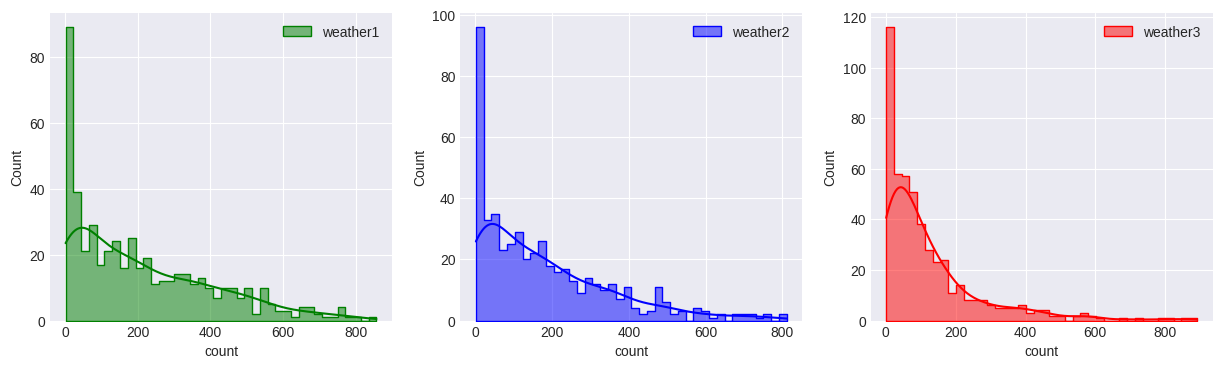

In [ ]:
plt.figure(figsize = (15, 4))
plt.subplot(1, 3, 1)
sns.histplot(df_weather1.loc[:, 'count'].sample(500), bins = 40,
             element = 'step', color = 'green', kde = True, label = 'weather1')
plt.legend()
plt.subplot(1, 3, 2)
sns.histplot(df_weather2.loc[:, 'count'].sample(500), bins = 40,
             element = 'step', color = 'blue', kde = True, label = 'weather2')
plt.legend()
plt.subplot(1, 3, 3)
sns.histplot(df_weather3.loc[:, 'count'].sample(500), bins = 40,
             element = 'step', color = 'red', kde = True, label = 'weather3')
plt.legend()
plt.plot()

It can be inferred from the above plot that the distributions do not follow normal distribution.

**Distribution check using QQ Plot**

[]

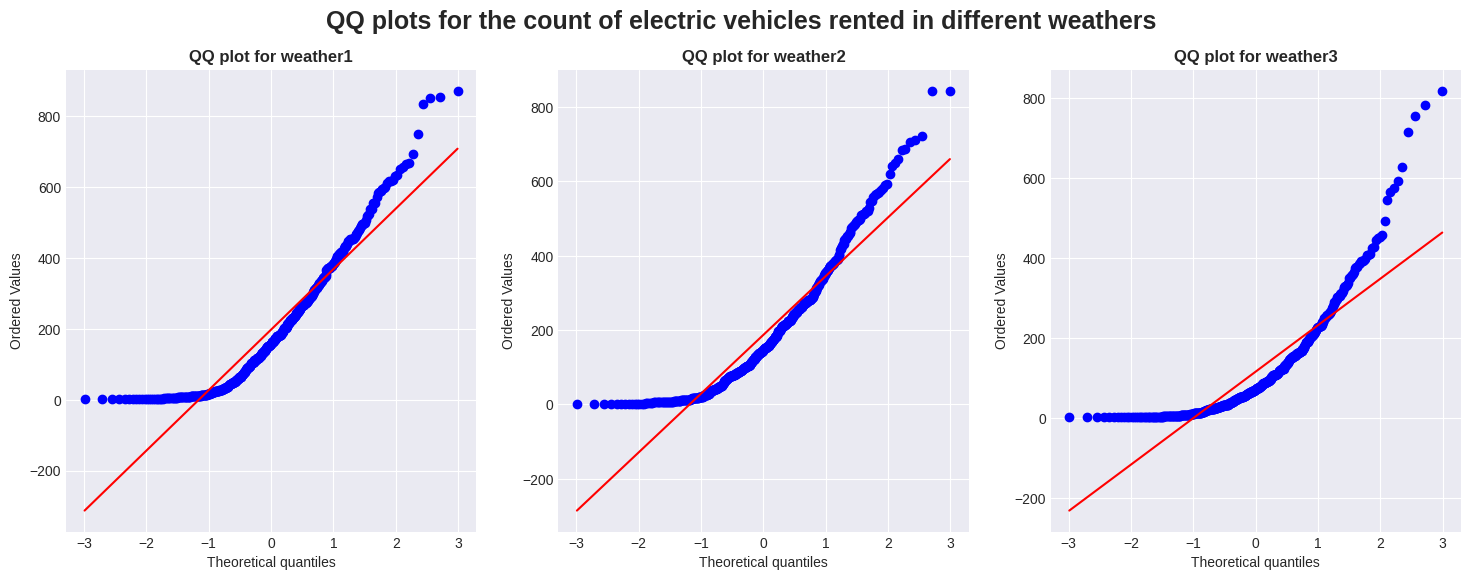

In [ ]:
plt.figure(figsize = (18, 6))
plt.subplot(1, 3, 1)
plt.suptitle('QQ plots for the count of electric vehicles rented in different weathers',fontweight = 'bold',fontsize = 18)
stats.probplot(df_weather1.loc[:, 'count'].sample(500), plot = plt, dist = 'norm')
plt.title('QQ plot for weather1',fontweight = 'bold',fontsize = 12)
plt.subplot(1, 3, 2)
stats.probplot(df_weather2.loc[:, 'count'].sample(500), plot = plt, dist = 'norm')
plt.title('QQ plot for weather2',fontweight = 'bold',fontsize = 12)
plt.subplot(1, 3, 3)
stats.probplot(df_weather3.loc[:, 'count'].sample(500), plot = plt, dist = 'norm')
plt.title('QQ plot for weather3',fontweight = 'bold',fontsize = 12)
plt.plot()

* It can be inferred from the above plot that the distributions do not follow normal distribution.

* It can be seen from the above plots that the samples do not come from normal distribution.

Applying **Shapiro-Wilk test for normality**
* H0 : The sample follows normal distribution
* Ha : The sample does not follow normal distribution

alpha = 0.05

**Test Statistics : Shapiro-Wilk test for normality**

In [ ]:
test_stat, p_value = stats.shapiro(df_weather1.loc[:, 'count'].sample(500))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 8.716420874656358e-19
The sample does not follow normal distribution


In [ ]:
test_stat, p_value = stats.shapiro(df_weather2.loc[:, 'count'].sample(500))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 9.883741386265458e-20
The sample does not follow normal distribution


In [ ]:
test_stat, p_value = stats.shapiro(df_weather3.loc[:, 'count'].sample(500))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 7.692752762073625e-27
The sample does not follow normal distribution


***Transforming the data using boxcox transformation and checking if the transformed data follows normal distribution.***

In [ ]:
transformed_weather1 = stats.boxcox(df_weather1.loc[:, 'count'].sample(5000))[0]
test_stat, p_value = stats.shapiro(transformed_weather1)
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 3.933325569864085e-27
The sample does not follow normal distribution


In [ ]:
transformed_weather2 = stats.boxcox(df_weather2.loc[:, 'count'])[0]
test_stat, p_value = stats.shapiro(transformed_weather2)
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 1.9216098393369846e-19
The sample does not follow normal distribution


In [ ]:
transformed_weather3 = stats.boxcox(df_weather3.loc[:, 'count'])[0]
test_stat, p_value = stats.shapiro(transformed_weather3)
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 1.4133181593933841e-06
The sample does not follow normal distribution


Even after applying the boxcox transformation on each of the weather data, the samples do not follow normal distribution.

***Homogeneity of Variances using Levene's test***

In [ ]:
# Null Hypothesis(H0) - Homogenous Variance

# Alternate Hypothesis(HA) - Non Homogenous Variance

test_stat, p_value = stats.levene(df_weather1.loc[:, 'count'].sample(500),
                                df_weather2.loc[:, 'count'].sample(500),
                                df_weather3.loc[:, 'count'].sample(500))
print('p-value', p_value)
if p_value < 0.05:
    print('The samples do not have  Homogenous Variance')
else:
    print('The samples have Homogenous Variance ')

p-value 3.798483885260607e-14
The samples do not have  Homogenous Variance


Since the samples are not normally distributed and do not have the same variance, f_oneway test cannot be performed here, we can perform its non parametric equivalent test i.e., Kruskal-Wallis H-test for independent samples.

In [ ]:
# Ho : Mean no. of cycles rented is same for different weather
# Ha : Mean no. of cycles rented is different for different weather
# Assuming significance Level to be 0.05

test_stat, p_value = stats.kruskal(df_weather1['count'], df_weather2['count'], df_weather3['count'])
print('Test Statistic =', test_stat)
print('p value =', p_value)
print("-"*40)
if p_value < alpha:
    print('Reject Null Hypothesis')
else:
    print('Failed to reject Null Hypothesis')

Test Statistic = 204.95566833068537
p value = 3.122066178659941e-45
----------------------------------------
Reject Null Hypothesis


**Therefore, the average number of rental bikes is statistically different for different weathers.**

# For season Column

In [ ]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
df_season_spring = df.loc[df['season'] == 1, 'count']
df_season_summer = df.loc[df['season'] == 2, 'count']
df_season_fall = df.loc[df['season'] == 3, 'count']
df_season_winter = df.loc[df['season'] == 4, 'count']
len(df_season_spring), len(df_season_summer), len(df_season_fall), len(df_season_winter)

(2686, 2733, 2733, 2734)

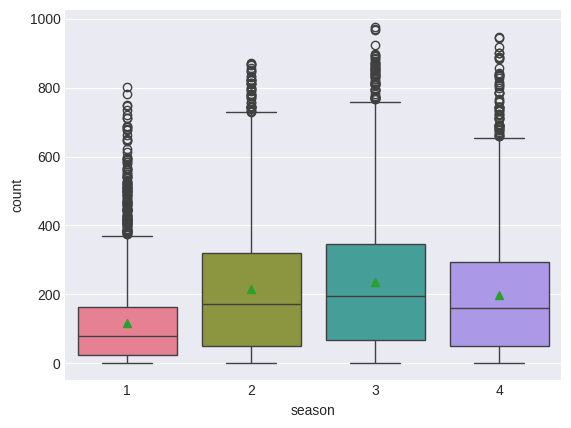

In [ ]:
season_palette = sns.color_palette("husl", 4)
sns.boxplot(data=df, x='season', y='count', showmeans=True, palette=season_palette)
plt.show()

 ***STEP-1* :** Set up Null Hypothesis

-----------------------------------------
**Null Hypothesis ( H0 ) **- Mean of cycle rented per hour is same for season 1,2,3 and 4.

**Alternate Hypothesis ( HA )** -Mean of cycle rented per hour is different for season 1,2,3 and 4.

 ***STEP-2* :** Checking for basic assumpitons for the hypothesis

-----------------------------------------
1. **Normality check** using QQ Plot. If the distribution is not normal, **use BOX-COX** transform to transform it to normal distribution.

2. Homogeneity of Variances using Levene's test

3. Each observations are independent.

***STEP-3*:** Define Test statistics

-----------------------------------------
The test statistic for a One-Way ANOVA is denoted as F. For an independent variable with k groups, the F statistic evaluates whether the group means are significantly different.

**F=MSB/MSW**

Under H0, the test statistic should follow F-Distribution.

 ***STEP-4*:** Decide the kind of test.

-----------------------------------------
We will be performing right tailed f-test

***STEP-5*:** Compute the p-value and fix value of alpha.

-----------------------------------------
we will be computing the anova-test p-value using the f_oneway function using scipy.stats. We set our alpha to be 0.05

***STEP-6*:** Compare p-value and alpha.

-----------------------------------------
Based on p-value, we will accept or reject H0. p-val > alpha : Accept H0 p-val < alpha : Reject H0

The one-way ANOVA compares the means between the groups you are interested in and determines whether any of those means are statistically significantly different from each other.

Specifically, it tests the null hypothesis (H0):

*µ1 = µ2 = µ3 = ..... = µk*

where, µ = group mean and k = number of groups.

If, however, the one-way ANOVA returns a statistically significant result, we accept the alternative hypothesis (HA), which is that there are at least two group means that are statistically significantly different from each other.

***Visual Tests to know if the samples follow normal distribution***

[]

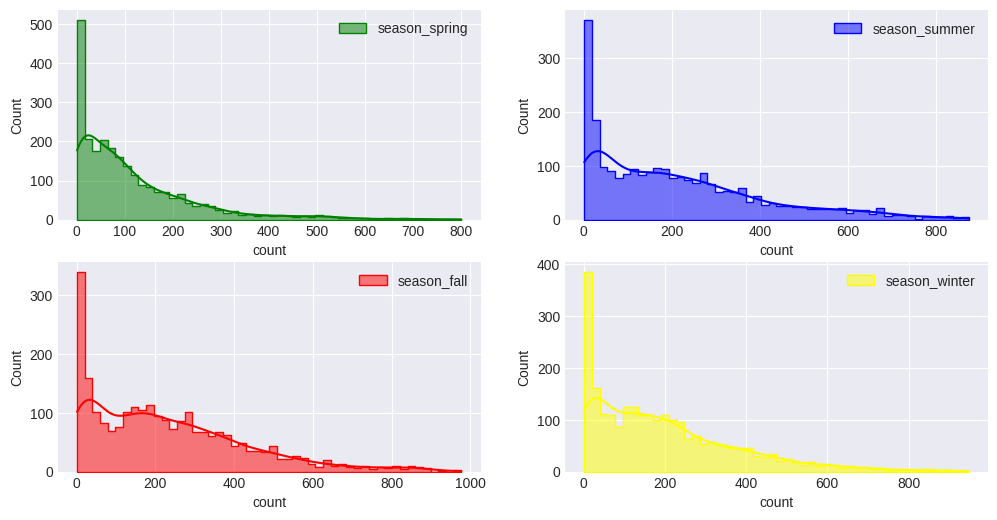

In [ ]:
plt.figure(figsize = (12, 6))
plt.subplot(2, 2, 1)
sns.histplot(df_season_spring.sample(2500), bins = 50,
             element = 'step', color = 'green', kde = True, label = 'season_spring')
plt.legend()
plt.subplot(2, 2, 2)
sns.histplot(df_season_summer.sample(2500), bins = 50,
             element = 'step', color = 'blue', kde = True, label = 'season_summer')
plt.legend()
plt.subplot(2, 2, 3)
sns.histplot(df_season_fall.sample(2500), bins = 50,
             element = 'step', color = 'red', kde = True, label = 'season_fall')
plt.legend()
plt.subplot(2, 2, 4)
sns.histplot(df_season_winter.sample(2500), bins = 50,
             element = 'step', color = 'yellow', kde = True, label = 'season_winter')
plt.legend()
plt.plot()

* It can be inferred from the above plot that the distributions do not follow normal distribution.

[]

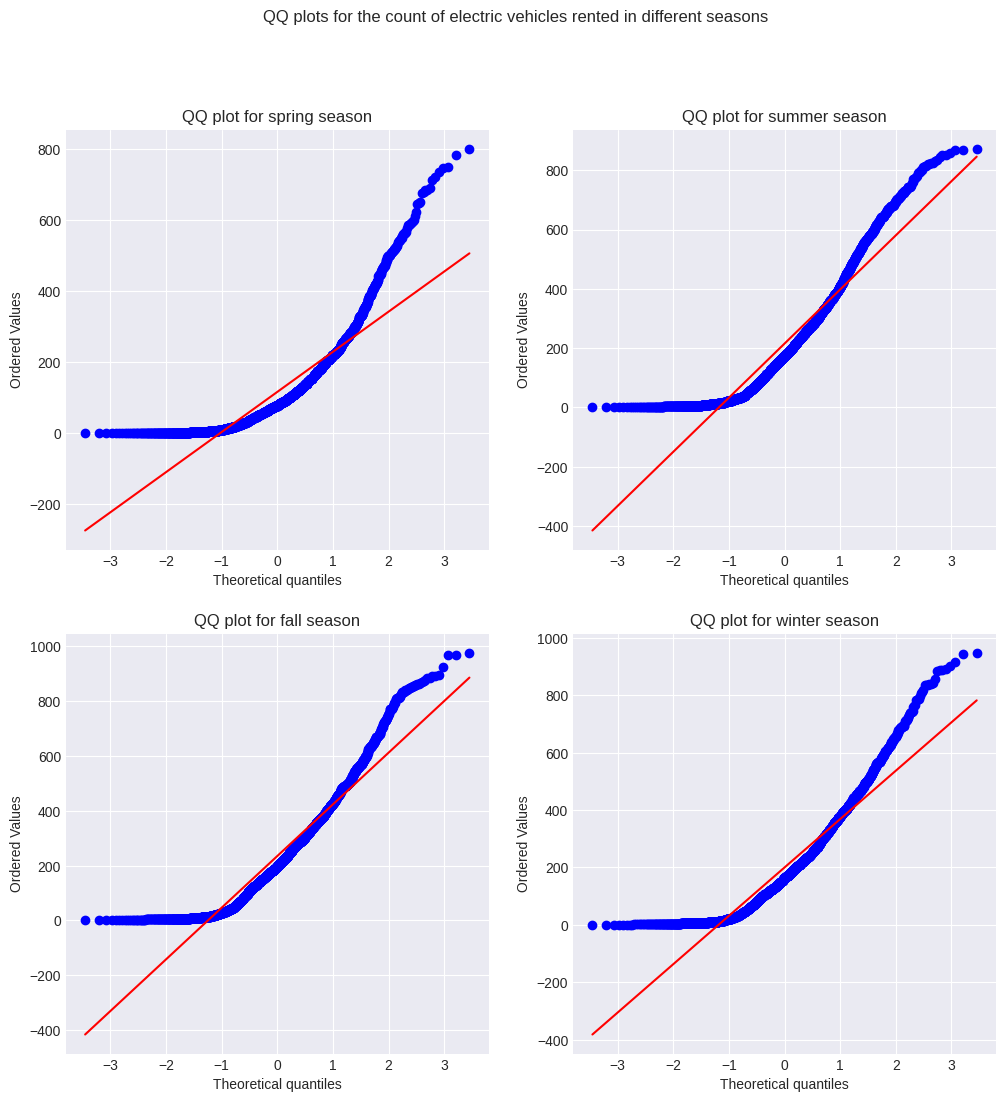

In [ ]:
plt.figure(figsize = (12, 12))
plt.subplot(2, 2, 1)
plt.suptitle('QQ plots for the count of electric vehicles rented in different seasons')
stats.probplot(df_season_spring.sample(2500), plot = plt, dist = 'norm')
plt.title('QQ plot for spring season')

plt.subplot(2, 2, 2)
stats.probplot(df_season_summer.sample(2500), plot = plt, dist = 'norm')
plt.title('QQ plot for summer season')

plt.subplot(2, 2, 3)
stats.probplot(df_season_fall.sample(2500), plot = plt, dist = 'norm')
plt.title('QQ plot for fall season')

plt.subplot(2, 2, 4)
stats.probplot(df_season_winter.sample(2500), plot = plt, dist = 'norm')
plt.title('QQ plot for winter season')
plt.plot()

* It can be inferred from the above plots that the distributions do not follow normal distribution.
* It can be seen from the above plots that the samples do not come from normal distribution.

Applying Shapiro-Wilk test for normality
 * H0 : The sample follows normal distribution
 * Ha : The sample does not follow normal distribution

**alpha = 0.05**

**Test Statistics : Shapiro-Wilk test for normality**

In [ ]:
test_stat, p_value = stats.shapiro(df_season_spring.sample(2500))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 0.0
The sample does not follow normal distribution


In [ ]:
test_stat, p_value = stats.shapiro(df_season_summer.sample(2500))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 1.0831361142851646e-37
The sample does not follow normal distribution


In [ ]:
test_stat, p_value = stats.shapiro(df_season_fall.sample(2500))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 7.317734297540537e-36
The sample does not follow normal distribution


In [ ]:
test_stat, p_value = stats.shapiro(df_season_winter.sample(2500))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 2.798832480455072e-38
The sample does not follow normal distribution


***Transforming the data using boxcox transformation and checking if the transformed data follows normal distribution.***

In [ ]:
transformed_df_season_spring = stats.boxcox(df_season_spring.sample(2500))[0]
test_stat, p_value = stats.shapiro(transformed_df_season_spring)
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 7.067050650571294e-17
The sample does not follow normal distribution


In [ ]:
transformed_df_season_summer= stats.boxcox(df_season_summer.sample(2500))[0]
test_stat, p_value = stats.shapiro(transformed_df_season_summer)
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 4.8643502988045856e-21
The sample does not follow normal distribution


In [ ]:
transformed_df_season_fall = stats.boxcox(df_season_fall.sample(2500))[0]
test_stat, p_value = stats.shapiro(transformed_df_season_fall)
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 1.6043254818274418e-21
The sample does not follow normal distribution


In [ ]:
transformed_df_season_winter = stats.boxcox(df_season_winter.sample(2500))[0]
test_stat, p_value = stats.shapiro(transformed_df_season_winter)
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 5.1141859856594494e-20
The sample does not follow normal distribution


* Even after applying the boxcox transformation on each of the season data, the samples do not follow normal distribution.
**Homogeneity of Variances using Levene's test*

In [ ]:
# Null Hypothesis(H0) - Homogenous Variance

# Alternate Hypothesis(HA) - Non Homogenous Variance

test_stat, p_value = stats.levene(df_season_spring.sample(2500),
                                df_season_summer.sample(2500),
                                df_season_fall.sample(2500),
                                df_season_winter.sample(2500))
print('p-value', p_value)
if p_value < 0.05:
    print('The samples do not have  Homogenous Variance')
else:
    print('The samples have Homogenous Variance ')

if p_value < alpha:
    print('Reject Null Hypothesis')
else:
    print('Failed to reject Null Hypothesis')

p-value 7.229337688958375e-110
The samples do not have  Homogenous Variance


***Since the samples are not normally distributed and do not have the same variance, f_oneway test cannot be performed here, we can perform its non parametric equivalent test i.e., Kruskal-Wallis H-test for independent samples.***

In [ ]:
# Ho : Mean no. of cycles rented is same for different weather
# Ha : Mean no. of cycles rented is different for different weather
# Assuming significance Level to be 0.05
alpha = 0.05
test_stat, p_value =stats.kruskal(df_season_spring, df_season_summer, df_season_fall,df_season_winter)
print('Test Statistic =', test_stat)
print('p value =', p_value)
print("--"*50)
if p_value < alpha:
    print('Reject Null Hypothesis')
else:
    print('Failed to reject Null Hypothesis')

Test Statistic = 699.6668548181988
p value = 2.479008372608633e-151
----------------------------------------------------------------------------------------------------
Reject Null Hypothesis


***Therefore, the average number of rental bikes is statistically different for different seasons.***

In [ ]:
corr_data = df.corr()
corr_data

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948


# Pearson Method

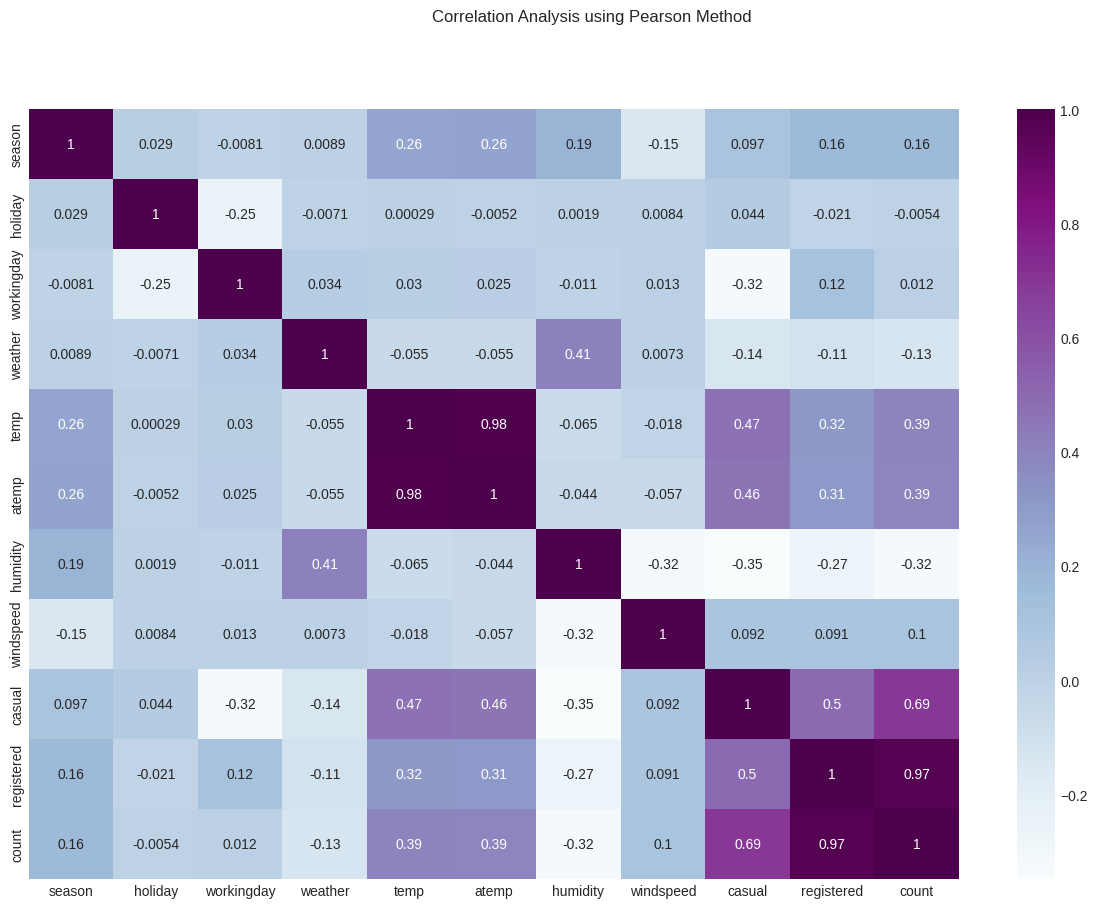

In [ ]:
# Plotting heatmap on the correlation analysis done using Pearson method

fig = plt.figure(figsize=(15,10))
fig.suptitle("Correlation Analysis using Pearson Method")
sns.heatmap(df.corr(),annot=True,cmap="BuPu")
plt.show()

* Very High Correlation (> 0.9) exists between columns [atemp, temp] and [count, registered]
* High positively / negatively correlation (0.7 - 0.9) does not exist between any columns.
* Moderate positive correlation (0.5 - 0.7) exists between columns [casual, count], [casual, registered].
* Low Positive correlation (0.3 - 0.5) exists between columns [count, temp], [count, atemp], [casual, atemp]
* Negligible correlation exists between all other combinations of columns.

# Spearman Rank Method

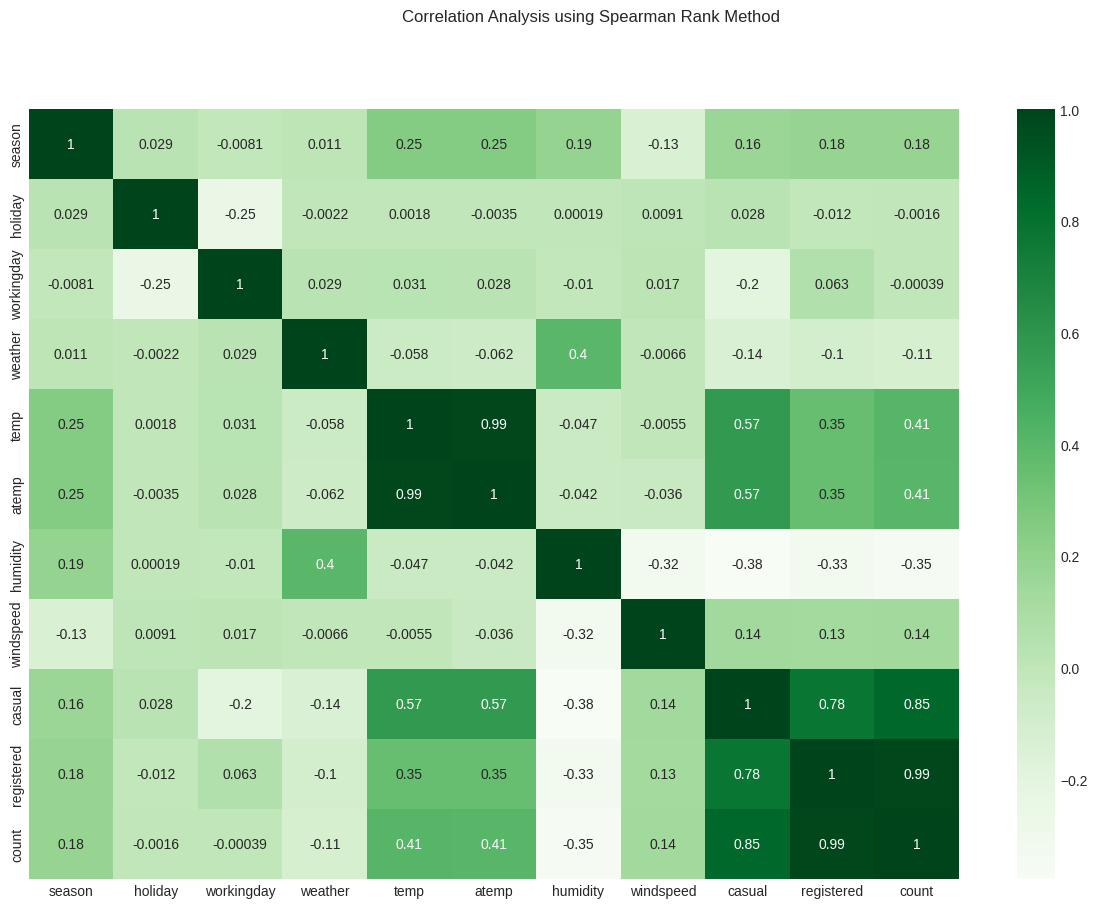

In [ ]:
fig = plt.figure(figsize=(15,10))
fig.suptitle("Correlation Analysis using Spearman Rank Method")
sns.heatmap(df.corr(method="spearman"),annot=True,cmap="Greens")
plt.show()

In [ ]:
x = df.copy()

In [ ]:
# setting the 'datetime' column as the index of the DataFrame 'df'
x.set_index('datetime', inplace = True)
# By setting the 'datetime' column as the index, it allows for easier and more efficient access,
  # filtering, and manipulation of the data based on the datetime values.
# It enables opercations such as resampling, slicing by specific time periods, and
    # applying time-based calculations.

* note :- resample('M'): This part of the code is using the resample method to resample the time series data. The argument 'M' stands for monthly frequency. This means that the data will be aggregated on a monthly basis.

In [ ]:

x.resample('M')['casual'].mean()


datetime
2011-01-31     4.658933
2011-02-28     8.466368
2011-03-31    17.735426
2011-04-30    26.876923
2011-05-31    34.791667
2011-06-30    42.982456
2011-07-31    57.335526
2011-08-31    38.552632
2011-09-30    40.421634
2011-10-31    37.712088
2011-11-30    22.269737
2011-12-31    11.138158
2012-01-31    11.576159
2012-02-29    12.134066
2012-03-31    37.683516
2012-04-30    60.757709
2012-05-31    55.745614
2012-06-30    63.539474
2012-07-31    54.390351
2012-08-31    62.039474
2012-09-30    60.504386
2012-10-31    45.894737
2012-11-30    33.402198
2012-12-31    21.098684
Freq: M, Name: casual, dtype: float64

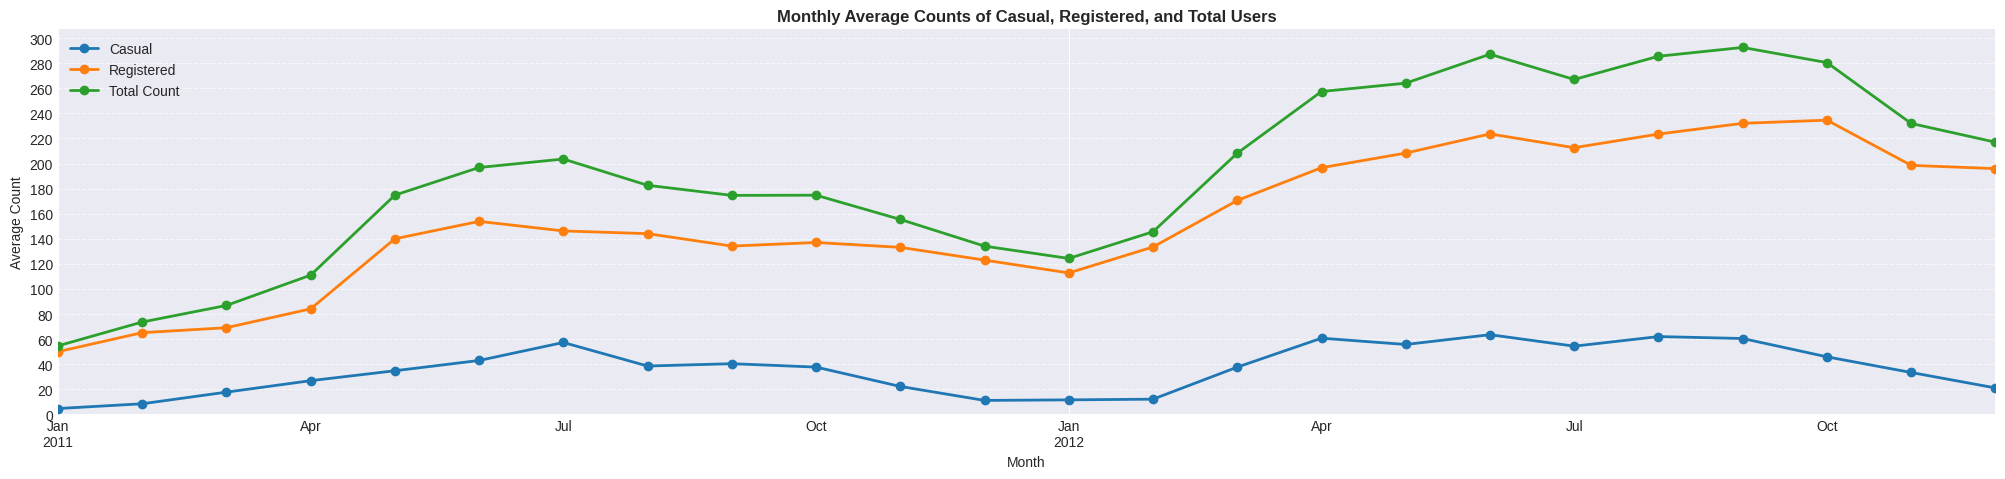

In [ ]:
# The below code visualizes the trend of the monthly average values for the 'casual', 'registered',
# and 'count' variables,  allowing for easy comparison and analysis of their patterns over time
plt.figure(figsize = (25,5))

# # plotting a lineplot by resampling the data on a monthly basis, and calculating the mean value
# # of 'casual', 'registered' and 'count' users for each month
x.resample('M')['casual'].mean().plot(kind='line', label='Casual', marker='o', linewidth=2)
x.resample('M')['registered'].mean().plot(kind='line', label='Registered', marker='o', linewidth=2)
x.resample('M')['count'].mean().plot(kind='line', label='Total Count', marker='o', linewidth=2)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Set y-axis ticks and limit
plt.yticks(np.arange(0, 301, 20))
plt.ylim(0,)
plt.legend()
plt.xlabel('Month')
plt.ylabel('Average Count')
plt.title('Monthly Average Counts of Casual, Registered, and Total Users',fontweight = 'bold',fontsize = 12)
plt.show()


*I want to know if there is an increase in the average hourly count of rental bikes from the year 2011 to 2012*

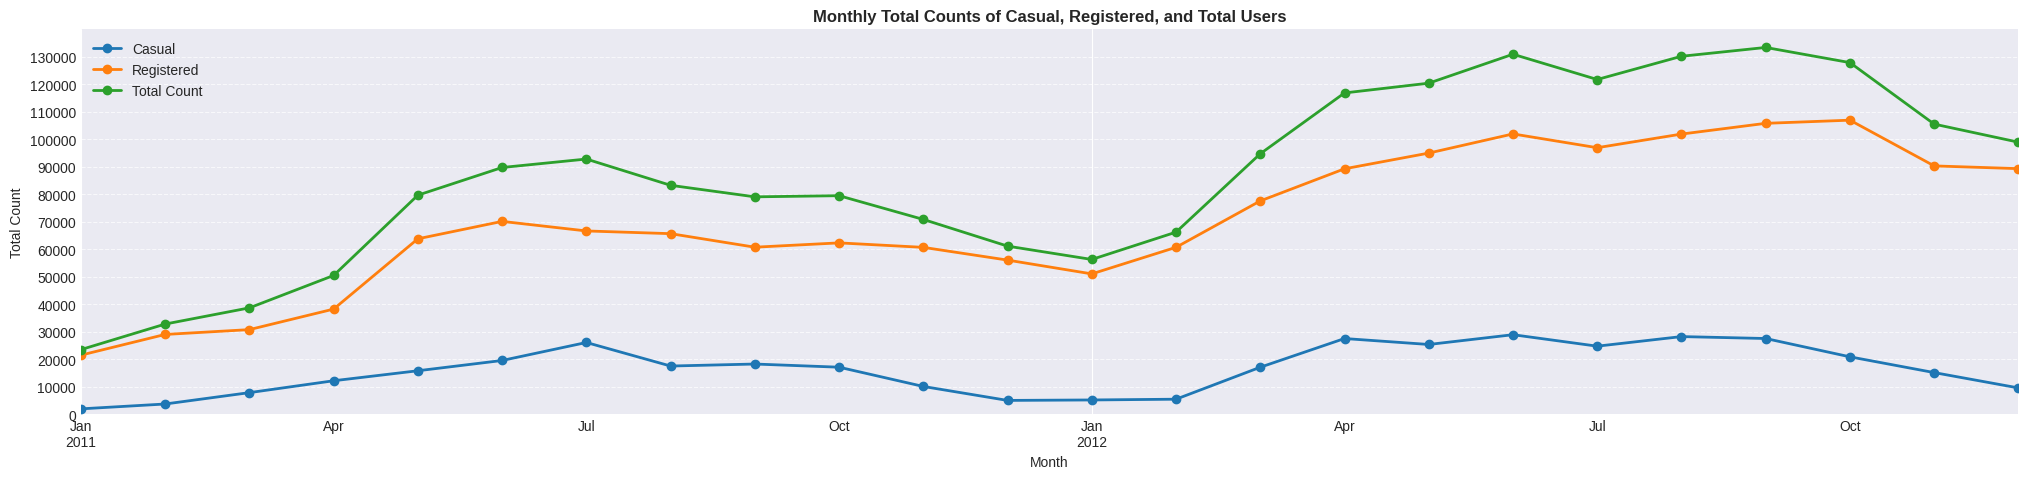

In [ ]:
plt.figure(figsize = (25,5))


# Plotting a lineplot by resampling the data on a monthly basis and calculating the sum
# of 'casual', 'registered', and 'count' users for each month
x.resample('M')['casual'].sum().plot(kind='line', label='Casual', marker='o', linewidth=2)
x.resample('M')['registered'].sum().plot(kind='line', label='Registered', marker='o', linewidth=2)
x.resample('M')['count'].sum().plot(kind='line', label='Total Count', marker='o', linewidth=2)  # Change mean to sum
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Set y-axis ticks and limit
plt.yticks(np.arange(0, 130001, 10000))

plt.ylim(0,)
plt.legend()
plt.xlabel('Month')
plt.ylabel('Total Count')
plt.title('Monthly Total Counts of Casual, Registered, and Total Users', fontweight='bold', fontsize=12)
plt.show()


In [ ]:
bike_count =  x.resample('Y')['count'].mean().to_frame().reset_index()
bike_count['prev_year']  = bike_count['count'].shift(1) # lag fuction
# fingding  growth percentage

bike_count['growth_percent'] = (bike_count['count'] - bike_count['prev_year'])* 100/(bike_count['prev_year'])
bike_count

,datetime,count,prev_year,growth_percent
0,2011-12-31,144.223349,NaN,NaN
1,2012-12-31,238.560944,144.223349,65.410764


* This data suggests that there was substantial growth in the count of the variable over the course of one year.
* The mean total hourly count of rental bikes is 144 for the year 2011 and 239 for the year 2012. An annual growth rate of 65.41 % can be seen in the demand of electric vehicles on an hourly basis.
**It indicates positive growth and potentially a successful outcome or increasing demand for the variable being measured.**

In [ ]:
y = df.copy()
y['month']  = y['datetime'].dt.month
y['year'] = y['datetime'].dt.year

In [ ]:
monthly_wise = y.groupby(['year', 'month'])['count'].mean().reset_index()
monthly_wise['prev_year']= monthly_wise['count'].shift(1)

# Calculate Percentage Growth Over Time
monthly_wise['growth_percentage'] = (monthly_wise['count'] - monthly_wise['prev_year'])* 100/(monthly_wise['prev_year'])
monthly_wise[['year','month','growth_percentage']]

,year,month,growth_percentage
0,2011,1,NaN
1,2011,2,34.762997
2,2011,3,17.936305
3,2011,4,27.837260
4,2011,5,57.448365
5,2011,6,12.624039
6,2011,7,3.421850
7,2011,8,-10.287782
8,2011,9,-4.403732
9,2011,10,0.086535


***How does the average hourly count of rental bikes varies for different month ?***

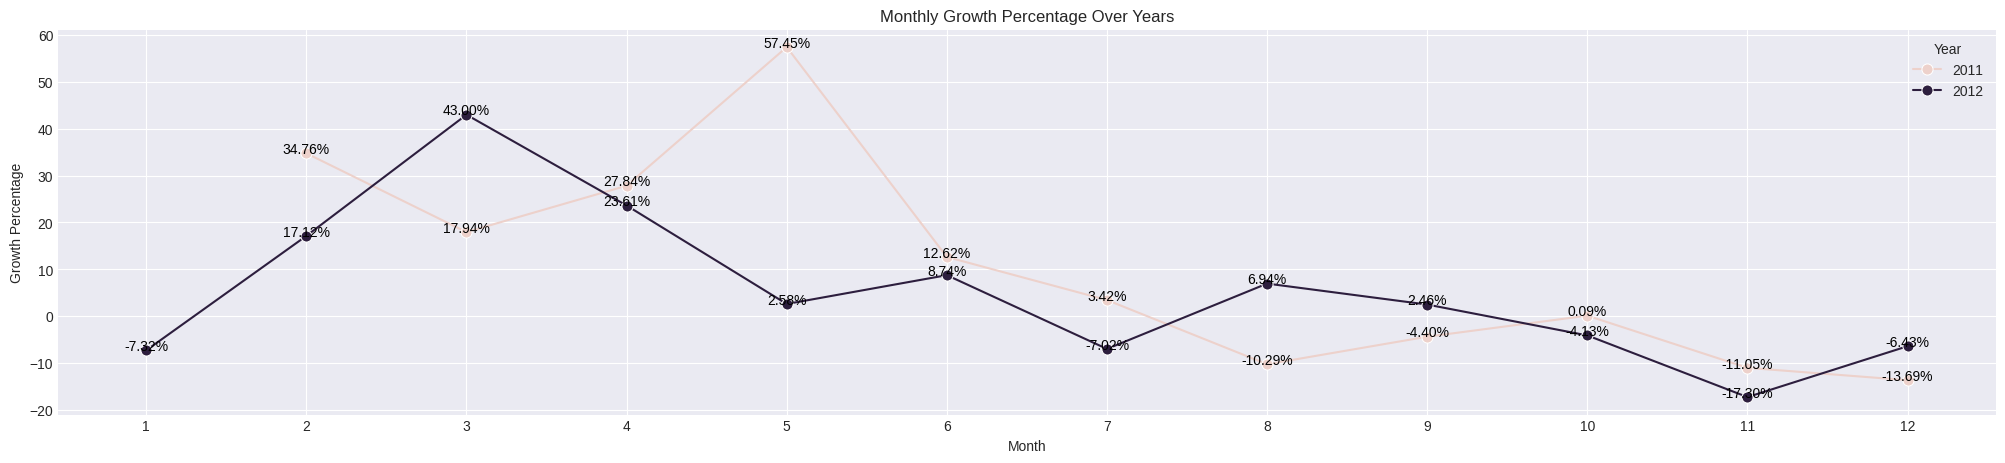

In [ ]:
# Assuming monthly_wise DataFrame with 'year', 'month', and 'growth_percentage' columns
plt.figure(figsize = (25,5))

# Line plot with markers
sns.lineplot(data=monthly_wise,
             x='month',
             y='growth_percentage',
             hue='year',
             marker='o',
             markersize=8)



for line in range(0, monthly_wise.shape[0]):
    plt.text(monthly_wise['month'][line],
             monthly_wise['growth_percentage'][line],
             f'{monthly_wise["growth_percentage"][line]:.2f}%',
             color='black',
             ha='center')

plt.title('Monthly Growth Percentage Over Years')
plt.xlabel('Month')
plt.ylabel('Growth Percentage')
plt.legend(title='Year')
plt.xticks(np.arange(1, 13))
plt.grid(True)
plt.show()


* The count of rental bikes shows an increasing trend from January to March, with a significant growth rate of 34.70% between February and March.
* The growth rate starts to stabilize from April to June, with a relatively smaller growth rate.
* From July to September, there is a slight decrease in the count of rental bikes, with negative growth rates.
* The count further declines from October to December, with the largest drop observed between October and November (-14.94%).

* The average hourly count of rental bikes is the highest in the month of June followed by July and August.
* The average hourly count of rental bikes is the lowest in the month of January followed by February and March.


Overall, these trends suggest a seasonal pattern in the count of rental bikes, with higher demand during the spring and summer months, a slight decline in the fall, and a further decrease in the winter months. It could be useful for the rental bike company to consider these patterns for resource allocation, marketing strategies, and operational planning throughout the year.

In [ ]:
avg_hourly_count = df.groupby(df['datetime'].dt.hour)['count'].mean().reset_index()
avg_hourly_count ['prev_year']= avg_hourly_count ['count'].shift(1)

# Calculate Percentage Growth Over Time
avg_hourly_count ['growth_percentage'] = (avg_hourly_count ['count'] - avg_hourly_count ['prev_year'])* 100/(avg_hourly_count ['prev_year'])
avg_hourly_count

,datetime,count,prev_year,growth_percentage
0,0,55.138462,NaN,NaN
1,1,33.859031,55.138462,-38.592718
2,2,22.899554,33.859031,-32.367959
3,3,11.757506,22.899554,-48.656179
4,4,6.407240,11.757506,-45.505110
5,5,19.767699,6.407240,208.521293
6,6,76.259341,19.767699,285.777526
7,7,213.116484,76.259341,179.462793
8,8,362.769231,213.116484,70.221104
9,9,221.780220,362.769231,-38.864655


[]

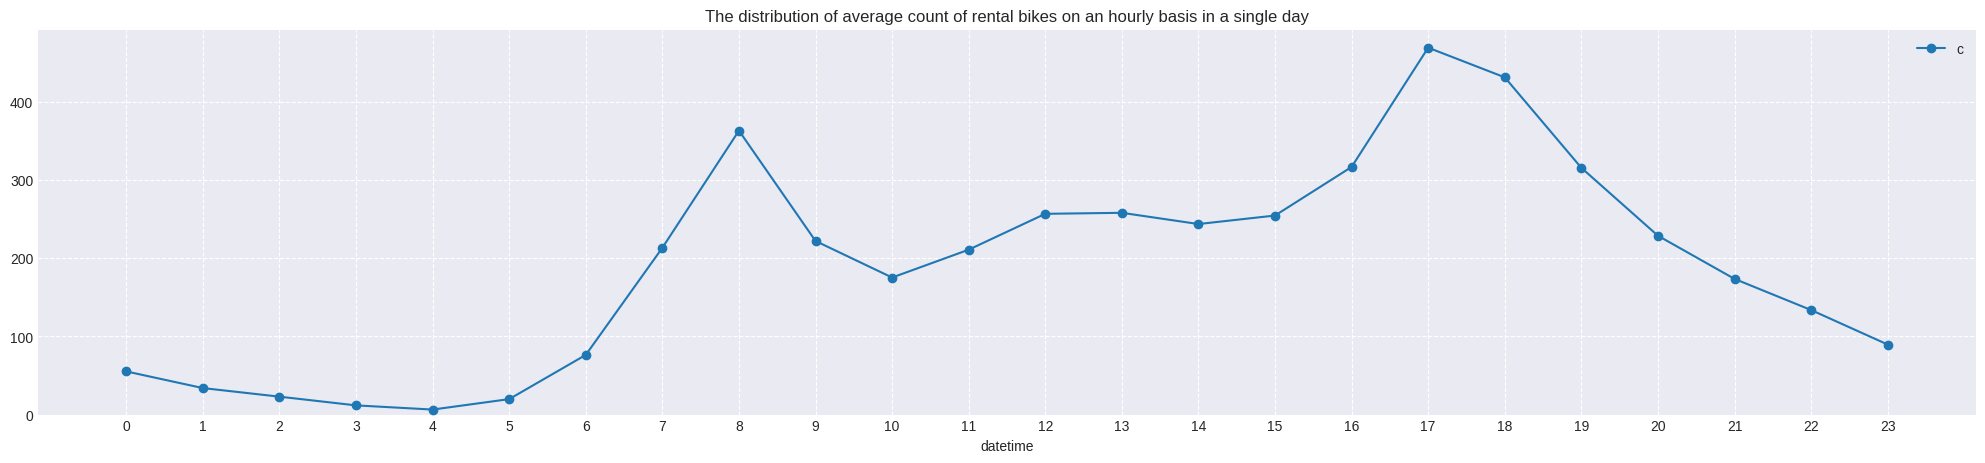

In [ ]:
plt.figure(figsize = (25,5))
plt.title("The distribution of average count of rental bikes on an hourly basis in a single day")
df.groupby(by = df['datetime'].dt.hour)['count'].mean().plot(kind = 'line', marker = 'o')
plt.ylim(0,)
plt.xticks(np.arange(0, 24))
plt.legend('count')
plt.grid(axis = 'both', linestyle = '--')
plt.plot()

* The average count of rental bikes is the highest at 5 PM followed by 6 PM and 8 AM of the day.
* The average count of rental bikes is the lowest at 4 AM followed by 3 AM and 5 AM of the day.

These patterns indicate that there is a distinct fluctuation in count throughout the day, with low counts during early morning hours, a sudden increase in the morning, a peak count in the afternoon, and a gradual decline in the evening and nighttime.

# Observation and Insights
* The data is given from Timestamp('2011-01-01 00:00:00') to Timestamp('2012-12-19 23:00:00'). The total time period for which the data is given is '718 days 23:00:00'.
* Out of every 100 users, around 19 are casual users and 81 are registered users.
* The mean total hourly count of rental bikes is 144 for the year 2011 and 239 for the year 2012. An annual growth rate of 65.41 % can be seen in the demand of electric vehicles on an hourly basis.
* There is a seasonal pattern in the count of rental bikes, with higher demand during the spring and summer months, a slight decline in the fall, and a further decrease in the winter months.
* The average hourly count of rental bikes is the lowest in the month of January followed by February and March.
* There is a distinct fluctuation in count throughout the day, with low counts during early morning hours, a sudden increase in the morning, a peak count in the afternoon, and a gradual decline in the evening and nighttime.
* More than 80 % of the time, the temperature is less than 28 degrees celcius.
* More than 80 % of the time, the humidity value is greater than 40. Thus for most of the time, humidity level varies from optimum to too moist.
* More than 85 % of the total, windspeed data has a value of less than 20.
* The hourly count of total rental bikes is the highest in the clear and cloudy weather, followed by the misty weather and rainy weather. There are very few records for extreme weather conditions.
* The mean hourly count of the total rental bikes is statistically similar for both working and non- working days.
There is statistically significant dependency of weather and season based on the hourly total number of bikes rented.
* The hourly total number of rental bikes is statistically different for different weathers.
* There is no statistically significant dependency of weather 1, 2, 3 on season based on the average hourly total number of bikes rented.
* The hourly total number of rental bikes is statistically different for different seasons.



# Recommendations
* **Seasonal Marketing:** Since there is a clear seasonal pattern in the count of
rental bikes, Yulu can adjust its marketing strategies accordingly. Focus on promoting bike rentals during the spring and summer months when there is higher demand. Offer seasonal discounts or special packages to attract more customers during these periods.

* **Time-based Pricing:** Take advantage of the hourly fluctuation in bike rental counts throughout the day. Consider implementing time-based pricing where rental rates are lower during off-peak hours and higher during peak hours. This can encourage customers to rent bikes during less busy times, balancing out the demand and optimizing the resources.

* **Weather-based Promotions:** Recognize the impact of weather on bike rentals. Create weather-based promotions that target customers during clear and cloudy weather, as these conditions show the highest rental counts. Yulu can offer weather-specific discounts to attract more customers during these favorable weather conditions.

* **User Segmentation:** Given that around 81% of users are registered, and the remaining 19% are casual, Yulu can tailor its marketing and communication strategies accordingly. Provide loyalty programs, exclusive offers, or personalized recommendations for registered users to encourage repeat business. For casual users, focus on providing a seamless rental experience and promoting the benefits of bike rentals for occasional use.

* **Optimize Inventory:** Analyze the demand patterns during different months and adjust the inventory accordingly. During months with lower rental counts such as January, February, and March, Yulu can optimize its inventory levels to avoid excess bikes. On the other hand, during peak months, ensure having sufficient bikes available to meet the higher demand.

* **Improve Weather Data Collection:** Given the lack of records for extreme weather conditions, consider improving the data collection process for such scenarios. Having more data on extreme weather conditions can help to understand customer behavior and adjust the operations accordingly, such as offering specialized bike models for different weather conditions or implementing safety measures during extreme weather.

* **Customer Comfort:** Since humidity levels are generally high and temperature is often below 28 degrees Celsius, consider providing amenities like umbrellas, rain jackets, or water bottles to enhance the comfort and convenience of the customers. These small touches can contribute to a positive customer experience and encourage repeat business.

* **Collaborations with Weather Services:** Consider collaborating with weather services to provide real-time weather updates and forecasts to potential customers. Incorporate weather information into your marketing campaigns or rental app to showcase the ideal biking conditions and attract users who prefer certain weather conditions.

* **Seasonal Bike Maintenance:** Allocate resources for seasonal bike maintenance. Before the peak seasons, conduct thorough maintenance checks on the bike fleet to ensure they are in top condition. Regularly inspect and service bikes throughout the year to prevent breakdowns and maximize customer satisfaction.

* **Customer Feedback and Reviews:** Encourage customers to provide feedback and reviews on their biking experience. Collecting feedback can help identify areas for improvement, understand customer preferences, and tailor the services to better meet customer expectations.

* **Social Media Marketing:** Leverage social media platforms to promote the electric bike rental services. Share captivating visuals of biking experiences in different weather conditions, highlight customer testimonials, and engage with potential customers through interactive posts and contests. Utilize targeted advertising campaigns to reach specific customer segments and drive more bookings.

* **Special Occasion Discounts:** Since Yulu focusses on providing a sustainable solution for vehicular pollution, it should give special discounts on the occassions like Zero Emissions Day (21st September), Earth day (22nd April), World Environment Day (5th June) etc in order to attract new users.